<h1 align="center"> Исследование данных о российском кинопрокате </h1>
    
__Цель исследования:__
    
Изучение рынка российского кинопроката и выявление текущих трендов. Исследование российских фильмов, получивших государственную поддержку.
    
__Порядок выполнения исследования:__
* Загрузка и изучение  общей информации в двух представленных датафреймах;
* Объединение исходных таблиц;
* Корректировка типов данных;
* Выявление пропусков в столбцах, их правка и чистка;
* Изучение столбцов с категориальными и количественными данными;
* Добавление необходимых столбцов в таблицу;
* Определение и анализ доли фильмов, для которых представлена информация о прокате;
* Изучение динамики проката по годам;
* Влияние возрастных ограничений на сумму сборов;
* Изучение размеров финансирования фильмов государством;
* Исследование окупаемости фильмов с гос. поддержкой;
* Рассмотрение взаимосвязи между гос. поддержкой  фильмов и их рейтингом;
* Формулирование итогового вывода проведенного исследования.

##  Импорт данных для исследования. Объединение данных из разных источников.

### Импорт данных.

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Создадим исходный датафрейм из данных первого источника:

In [2]:
df_movies = pd.read_csv('mkrf_movies.csv')

Получим первую общую информацию по этим данным:

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Мы видим очень неравномерное заполнение таблицы данными. Объяснение простое: первые 9 столбцов до возрастной категории включительно взяты действительно с портала открытых данных Министерства культуры, и они заполнены практически на 100%. А столбцы с 10 по 15 были взяты из других источников и добавлены в таблицу. Видимо, источниками дополнительных данных являлся интернет-ресурс "Кинопоиск" и сайт Фонда кино. Например, на сайте Фонда кино размещена информация о финансировании фильмов из бюджета, а значит речь идет только о кинолентах российского производства. Эти ограниченные данные и были добавлены в нашу таблицу.

Теперь посмотрим на нашу таблицу в явном виде:

In [4]:
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Импортируем данные из второго источника:

In [5]:
df_shows = pd.read_csv('mkrf_shows.csv')

Смотрим общее содержимое:

In [6]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
df_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


### Объединение таблиц.

Мы видим, что в обеих таблицах есть столбец с одинаковым наименованием. Это номер прокатного удостоверения puNumber. По этому номеру и будем объединять наши таблицы.

Далее, мы видим, что тип данных в столбцах puNumber не совпадает. В первой таблице это object, во второй - int64. Поскольку, по факту, это целое число. Приведем столбец к целочисленному типу:

In [8]:
# df_movies['puNumber'].astype('int')

Не получается выполнить преобразование в целочисленный тип, мы видим ошибку с указанием на недопустимый литерал - где-то в столбце попадается слово "нет".  Посмотрим на эту строку:

In [9]:
df_movies_net = df_movies[df_movies['puNumber']=='нет']
df_movies_net

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Нам нужно присвоить какое-то правдоподобное, но необязательно точное значение для прокатного удостоверения вместо слова "нет". Для этого необходимо разобраться с системой назначения определенных номеров прокатных удостоверений. В данном случае, удобно это было сделать в Excel - отсортировать данные по puNumber и посмотреть по другим столбцам схожие характеристики. Из данного рассмотрения удалось сделать следующие выводы:
* последние две цифры номера удостоверения - это год выдачи удостоверения;
* первые три цифры номера имеют отношение к стране производства фильма и его типу;
* номера имеют хронологический порядок - 4 цифры в середине номера возрастают с течением времени.

По первым трем цифрам мы имеем следующее распределение:
* 111 - художественные фильмы, снятые в СССР, России или совместного с нами производства;
* 112 - то же самое, только для документальных фильмов;
* 113 - то же самое для научно-популяярных;
* 114 - то же самое для анимационных.

Далее, идет похожий блок для фильмов иностранного производства:
* 120, 121 - художественные;
* 122 - документальные;
* 123 - научно-популярные;
* 124 - анимационные;
* 126 - прочие.

Далее,  блок номеров для стран ранее бывших частью СССР:
* 131, 134, 136.

Далее следуют два блока, аналогичных первым двум - для наших фильмов и иностранных, только начинаются они с цифры 2, а не 1:
* 211, 212, 213, 214, 216, 217

и
* 221, 223, 224, 226, 231.

Чем отличаются соответствующие номера,  стартующие с 1 или 2 сказать точно нельзя. Скорее всего речь идет о разных типах прокатных удостоверений, выдаваемых для разных целей, но мы не можем из имеющихся данных точно сказать для каких.

Теперь вернемся к нашему фильму с отсутствующим номером удостоверения и попробуем подобрать его. Нам не обязательно знать точный выданный номер, поскольку в нашем исследовании эти номера играют второстепенную роль. Итак, мы знаем, что это художественный фильм российского производства 2014 года, т.е. первые три цифры номера - 111, последние две - 14.

Посмотрим, какие номера выдавались в течение мая 2014 года. Сделаем отбор и отсортируем по дате. Да, прежде чем мы сможем это сделать, необходимо столбец show_start_date привести к формату даты и времени:

In [10]:
df_movies['show_start_date'] = pd.to_datetime(df_movies['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [11]:
df_movies_may2014 =\
df_movies.query('(show_start_date.dt.year==2014)&(show_start_date.dt.month==5)&(production_country=="Россия")')
df_movies_may2014.sort_values(by='show_start_date')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма
1541,"СЕКС, КОФЕ СИГАРЕТЫ",111004914,2014-05-07 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ФИЛЬМ №1""",Россия,С.Ольденбург-Свинцов,"И.Грушелевский, А.Перепелицын, С.Ольденбург-Св...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,2.8,"драма,комедия"
1797,Курбан-роман. (История с жертвой),нет,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
1584,Дневник мамы первоклассника,111005114,2014-05-19 12:00:00+00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,А.Силкин,"С.Говорухин, Е.Маскина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.0,"детский,мелодрама,семейный"
1810,Тайна темной комнаты,111005214,2014-05-19 12:00:00+00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,О.Беляева,"С.Говорухин, Е.Маскина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.0,"приключения,детский"
1813,ЧЕЛОВЕК МИРА,111005314,2014-05-22 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Прогресс""",Россия,А.Кириллов,И.Аносов,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"драма,музыка"
1250,ЧЕЛОВЕК МИРА (другая версия),111005414,2014-05-23 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Прогресс""",Россия,А.Кириллов,И.Аносов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
1267,Лимузин.,111005614,2014-05-23 12:00:00+00:00,Художественный,"ОАО ""Киностудия ""Ленфильм""",Россия,Р.Ершов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.4,"драма,комедия"
1606,Крылья .,111005514,2014-05-23 12:00:00+00:00,Художественный,"ОАО ""Киностудия ""Ленфильм""",Россия,А.Лобанов,В.Тельнов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.7,драма
1605,Тайна четырех принцесс,111005714,2014-05-26 12:00:00+00:00,Художественный,"ООО ""Каро Продакшн""",Россия,О.Штром,"Ю.Обухов, А.Рязанцев",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.8,"комедия,фэнтези"


Первые пять цифр - 11100 и последние две - это 14. Не хватает двух цифр для получения полного номера. Посмотрим какие две цифры стояли для российских художественных фильмов до нашего фильма и после. До мы находим числа 43 и 49. После - начиная с 51 и подряд до 59. Тут без вариантов, остается только 50. Полное число получается 111005014.

In [12]:
# Подставим полученный номер удостоверения вместо слова "нет":
df_movies.loc[1797, 'puNumber'] = '111005014'

# Проверим новый номер на повторы:
len(df_movies[df_movies['puNumber'] == '111005014'])

1

Теперь, когда столбец puNumber укомплектован полностью, приведем его к целочисленному типу:

In [13]:
df_movies['puNumber'] = df_movies['puNumber'].astype('int')

Для объединения таблиц будет удобно столбец, по которому объединяются данные, сделать индексом.

И важный шаг, который необходимо предпринять перед заменой столбца на индекс - нужно убедиться, что в столбце puNumber все значения уникальны:

In [14]:
df_movies.groupby('puNumber').count().sort_values(by='title', ascending=False)['title'].head()

puNumber
221054410    2
221154310    2
1811096      1
121029214    1
121029319    1
Name: title, dtype: int64

Так, не порядок. Получили два задвоенных номера в столбце puNumber. Выведем эти строки на экран:

In [15]:
df_movies_duble = df_movies[(df_movies['puNumber']==221054410)|(df_movies['puNumber']==221154310)]
df_movies_duble

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия"
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал"
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


Да, пока мы отсюда далеко не ушли, давайте обратим внимание на киностудию фильмов с призывом к анализу. "Уорнер Бразерс" вроде написано одинаково, а дальше? "Вилладж Роудшоу..." и "Виллидж Роадшоу...". Да, с транскрипцией английского языка определенно есть проблемы. Этот пример вскрывает целый пласт проблем, которые спрятаны в нашей таблице. И дело даже не в знании английского языка и способности правильно записать эти слова русскими буквами. Тут же помимо прочего еще куча имен, которые могут произноситься совершенно по разному при одинаковом английском написании, и это не будет ошибкой, это же имена собственные. 

В будущем, решением проблемы было бы дублирование столбцов с текстовой информацией соответствующими столбцами с записями на языке оригинала (основной страны производства фильма). Это поможет свести к минимуму ошибки перевода и транскрипции.

А сейчас нам остается лишь признать тот факт, что провести анализ по киностудиям, режиссерам или продюсерам не получится (для фильмов иностранного производства), т.к. одни и те же имена записаны по-разному, а исправлять их вручную мы конечно не будем.

Ладно, это было лирическое отступление. Вернемся к повторам в столбце puNumber. Вы уже знаем как примерно подобрать номер прокатного удостоверения. Пойдем тем же путем и в этом случае:

Посмотрим на данные за май 2010 года, чтобы подобрать подходящий номер для фильма "Анализируй...". Чтобы немного сократить майский список уберем из него также российские фильмы:

In [16]:
df_movies_may2010 =\
df_movies.query('(show_start_date.dt.year==2010)&(show_start_date.dt.month==5)&(production_country!="Россия")')
df_movies_may2010.sort_values(by='show_start_date')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4389,Репортаж из преисподней,121008410,2010-05-04 12:00:00+00:00,Художественный,Филмакс,Испания,"Джуеме Балогуеро, Пако Плаза",Джулио Фернандез,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"ужасы,фантастика,фэнтези"
4355,Первый рай,226017410,2010-05-04 12:00:00+00:00,Прочие,Би-Би-Си,Великобритания,Дэвид Аттенборо,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.4,"мультфильм,короткометражка,мелодрама"
3994,Стать Джоном Ленноном,121008610,2010-05-05 12:00:00+00:00,Художественный,"Авер Медиа, Экосси Филмз, Филм 4, Норс Вест Ви...",Канада-Великобритания,Сэм Тейлор Вуд,"Роберт Бернштейн, Кевин Лоудер, Дуглас Рэй",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"драма,мелодрама,биография"
3999,Замерзшие души,121008310,2010-05-05 12:00:00+00:00,Художественный,"Самуэль Голдвин Филмз, Ту Лейн Пикчерз, Виннер...",США-Франция,Софи Бартез,"Дэниэл Кэри, Элизабет Джаматти, Джон Хинански",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.5,"драма,комедия"
4231,План Б.,221030610,2010-05-06 12:00:00+00:00,Художественный,"Си Би Эс Филмз, Искейп Артистс",США,Алан Пол,"Тодд Блэк, Джейсон Блюменталь",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.2,"мелодрама,комедия"
3923,Я не Мессия. Оратория. Трансляция из Королевск...,126000710,2010-05-07 12:00:00+00:00,Прочие,Монти Пайтон Пикчерз,Великобритания,Обри Паулл,Джон Голдстоун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.8,"мюзикл,комедия,музыка"
4288,Непокоренный.,121008810,2010-05-07 12:00:00+00:00,Художественный,"Уорнер Бразерс, Спайгласс Интертейнмент, Револ...",США,Клинт Иствуд,Клинт Иствуд,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"история,спорт,драма"
4158,Киллеры,121009010,2010-05-12 12:00:00+00:00,Художественный,"Каталист Филмз, Лайонсгейт",США,Роберт Лукетич,"Скотт Аверсано, Джейсон Голдберг, Майк Карц, Э...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"боевик,триллер,мелодрама"
4357,Красавчик-2,221060010,2010-05-12 12:00:00+00:00,Художественный,"Ротсхирч Картун Филмс, Севен Пикчерз, Уорнер Б...",Германия,Тиль Швайгер,Тиль Швайгер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"мелодрама,комедия"
4276,Книга крови /По мотивам рассказов Клайва Барке...,121008710,2010-05-12 12:00:00+00:00,Художественный,"Матадор Пикчерз, Миднайт Пикче Шоу, Плам Филмз...",Великобритания,Джон Харрисон,"Лаури Апелиан, Клайв Баркер, Питер Грэнджер-Беван",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.3,"ужасы,триллер,детектив"


Подберем какой-нибудь правдоподобный номер для одного из фильмов пары "Анализируй...". Например, 221054310. И проверим, не повторит ли он номер из какой-либо другой строки:

In [17]:
# Подставляем выбранный номер:
df_movies.loc[5067, 'puNumber'] = 221054310

# Проверяем на уникальность:
df_movies.loc[df_movies['puNumber']==221054310].count()

title                    1
puNumber                 1
show_start_date          1
type                     1
film_studio              1
production_country       1
director                 1
producer                 1
age_restriction          1
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  1
genres                   1
dtype: int64

Номер выбран удачно, повтора не выявлено.

Остается добавить по данным фильмам следующий момент. На сайте Кинопоиска можно увидеть, что премьера этих фильмов в России состоялась в 1999 и 2003 годах. Но в нашем случае речь идет о 2010 годе и на сайте мы опять же находим для обоих фильмов, что релиз на Blue-ray состоялся 8 июня 2010 года. Т.е. прокатное удостоверение было выдано на выпуск Blue-ray диска, причем это было специальное подарочное издание комплекта из двух дисков. Может, поэтому у них одинаковый puNumber?

Тем не менее, нам важнее было разделить эти номера, что мы и сделали.

Теперь разберемся со второй парой:

In [18]:
df_movies_december2010 = df_movies.query('(show_start_date.dt.year==2010)&(show_start_date.dt.month==12)')
df_movies_december2010.sort_values(by='show_start_date')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4178,Рок-н-Рольщик,221138810,2010-12-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Дарк Касл Интертейнмент, Тофф ...",США - Великобритания,Гай Ричи,Стив Ричардс,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.8,"криминал,боевик,триллер"
4169,Матрица,221137710,2010-12-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД, Сил...",США-Австралия,"Ларри Вачовски, Энди Вачовски",Джоэл Силвер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.5,"фантастика,боевик"
4170,Матрица: Перезагрузка,221137810,2010-12-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз, Силвер ...",США-Австралия,"Ларри Вачовски, Энди Вачовски","Брюс Берман, Джоэл Силвер, Грант Хилл",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фантастика,боевик"
4171,Матрица: Революция,221137910,2010-12-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Эн Пи Ви Интертейнмент, Сильве...",США-Австралия,"Ларри Вачовски, Энди Вачовски","Брюс Берман, Джоел Сильвер, Грант Хилл",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика,боевик"
4172,Двенадцать друзей Оушена,221138010,2010-12-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Пикчерз, Джерр...",США,Стивен Содерберг,Джерри Вайнтрауб,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,криминал"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,Таинственная река /По роману Дэнниса Лихэйна/,221175010,2010-12-31 12:00:00+00:00,Художественный,Уорнер Бразерс,США-Австралия,Клинт Иствуд,"Брюс Берман, Клинт Иствуд, Джуди Хойт",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.8,"триллер,драма,криминал"
4753,"С глаз - долой, из чарта - вон!",221174910,2010-12-31 12:00:00+00:00,Художественный,"Касл Рок Интертейнмент, Виллидж Роадшоу Пикчер...",США,Марк Лоренс,"Лиз Глотзер, Мартин Шафер",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"мелодрама,комедия,музыка"
4763,Крошка из Беверли Хиллз 2,221173710,2010-12-31 12:00:00+00:00,Художественный,Уолт Дисней Пикчерз,США,Алекс Замм,Майк Каллахан,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.8,"комедия,приключения,семейный"
4757,Непокоренный.,221175810,2010-12-31 12:00:00+00:00,Художественный,"Уорнер Бразерс, Спайгласс Интертейнмент, Револ...",США,Клинт Иствуд,Клинт Иствуд,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"история,спорт,драма"


Получили 257 строк среди которых где-то затерялись наши две искомые строки. Да, декабрь гораздо популярнее чем май для выхода фильма в прокат. Изменим подход и немного сузим требуемый интервал:

In [19]:
df_movies_december2010 = df_movies.query('4620<=index<=4660')
df_movies_december2010.sort_values(by='puNumber')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4660,Дружба,121022510,2010-12-03 12:00:00+00:00,Художественный,"Севен Пикчерз, Мр. Браун Интертейнмент",Германия,Маркус Голлер,"Кюрин Берг, Томас Цимклер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.8,"драма,комедия,криминал"
4620,Шаг вперед 3D,221152110,2010-12-17 12:00:00+00:00,Художественный,"Саммит Интертейнмент, Офсприн Интертейнмент, Т...",США,Джон Чу,"Дженнифер Джибгот, Эрик Фейг, Эми Херман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"драма,мелодрама,музыка"
4621,Фрида /по книге Хэйден Херрера/,221152210,2010-12-17 12:00:00+00:00,Художественный,Мирамакс,США,Джули Тэймор,"Сара Грин, Сальма Хайек",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"драма,мелодрама,биография"
4622,Убить Билла. Часть 2,221152310,2010-12-17 12:00:00+00:00,Художественный,"Мирамакс, Бэнд Апарт, Супер Коол МэнХу",США,Квентин Тарантино,Лоуренс Бендер,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.5,"боевик,триллер,криминал"
4623,Супергеройское кино,221152410,2010-12-17 12:00:00+00:00,Художественный,"Дименшн Филмз, Ванштейн Компани",США,Крэйг Мэзин,"Джефф Мейнард, Крэйг Мэзин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,"фантастика,боевик,комедия"
4624,Сумерки /По одноименному роману Стефани Майер/,221152510,2010-12-17 12:00:00+00:00,Художественный,"Импринт Интертейнмент, Мэверик Филмз, Саммит И...",США,Кэтрин Хардуик,"Марк Морган, Грэг Мурадян, Карен Розенфелд",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"фэнтези,драма,мелодрама"
4625,Сумерки. Сага. Новолуние /По произведению Стеф...,221152610,2010-12-17 12:00:00+00:00,Художественный,Саммит Интертейнмент,США,Крис Вайц,"Билл Баннерман, Мартин Бауэн, Вик Годфри",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.0,"фэнтези,драма,мелодрама"
4626,Сумерки. Сага. Затмение /По произведению Стефа...,221152710,2010-12-17 12:00:00+00:00,Художественный,"Саммит Интертейнмент, Темпл Хилл Интертейнмент...",США,Дэвид Слэйд,"Билл Баннерман, Марти Бауэн, Вик Годфри",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"фэнтези,триллер,мелодрама"
4627,Стан Хельсинг /Пародия/,221152810,2010-12-17 12:00:00+00:00,Художественный,"Боз Продакшнз, Хельсинг Релизинг, Инсайт Прода...",США - Канада,Бо Дзенга,"Кристиан Арнольд-Бьютел, Скотт М.Боджио, Вилли...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.2,"ужасы,комедия"
4628,Сайлент Хилл,221153010,2010-12-17 12:00:00+00:00,Художественный,"Дави-Фильм, Сайлент Хилл ДиСиПи Инк., Тристар ...",Япония-США-Франция,Кристоф Ган,"Дон Кармонди, Самуэл Хадида",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"ужасы,детектив"


Мы вывели 40 строк, которые расположены рядом с интересующим нас фрагментом таблицы (20 строк до и 20 после). Практически все они датированы 17 декабря. Какой-то очень популярный день для выхода фильмов. Как и весь декабрь. Объяснение простое и его можно найти на сайте открытых данных Министерства культуры: на все эти фильмы выдано прокатное удостоверение с категорией "видео по запросу", т.е. для демонстрации в онлайн-кинотеатрах. Прокатчик пришел с длинным списком и получил удостоверения сразу на весь список одним днем.

Для первого фильма из нашей пары "Как жениться и остаться холостым" выберем подходящий номер, например 221154210. Подставим и проверим на совпадения:

In [20]:
# Подставляем выбранный номер:
df_movies.loc[4638, 'puNumber'] = 221154210

# Проверяем на уникальность:
df_movies.loc[df_movies['puNumber']==221154210].count()

title                    1
puNumber                 1
show_start_date          1
type                     1
film_studio              1
production_country       1
director                 1
producer                 1
age_restriction          1
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  1
genres                   1
dtype: int64

Совпадений не выявлено.

Проверим еще раз всю первую таблицу на наличие совпадений в столбце puNumber:

In [21]:
df_movies.groupby('puNumber').count().sort_values(by='puNumber')['title']

puNumber
1811096      1
111000110    1
111000111    1
111000112    1
111000113    1
            ..
226014714    1
226017410    1
226019110    1
231001012    1
231001111    1
Name: title, Length: 7486, dtype: int64

Теперь все в порядке, все номера уникальные. Есть еще правда подозрительный короткий номер, который оказался на первом месте после сортировки. Оставим как есть, но если вдруг  дальше нам понадобится более реальное значение, мы что-нибудь придумаем.

По второй нашей таблице:

In [22]:
len(df_shows)

3158

Всего 3158 строк.

Проверим вторую таблицу на уникальность значений puNumber:

In [23]:
len(df_shows['puNumber'].unique())

3158

Число уникальных значений совпадает с размером таблицы, поэтому здесь все в порядке.

Теперь мы можем наконец превратить столбцы puNumber в индексы и объединить наши таблицы:

In [24]:
# Заменяем индексы в первой таблице:
df_movies.set_index('puNumber', inplace=True)

# Заменяем индексы во второй таблице:
df_shows.set_index('puNumber', inplace=True)

# Добавляем в первую таблицу столбец с нужной информацией из второй таблицы:
df_movies['box_office'] = df_shows['box_office']

# Переименуем датафрейм:
df = df_movies
df.head()

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
puNumber,,,,,,,,,,,,,,,
221048915,Открытый простор,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
111013716,Особо важное задание,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
221038416,Особо опасен,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
221026916,Особо опасен,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
221030815,Особо опасен,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


## Предобработка данных.

### Проверка и преобразование типов данных.

Мы уже немного поработали с нашими данными в ходе объединения таблиц: избавились от столбца puNumber, превратив его в целочисленный индекс, столбец с датой show_start_date привели к нужному формату. Плюс, появился новый столбец box_office с кассовыми сборами.

Посмотрим на общую информацию:

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 221048915 to 124010719
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   show_start_date        7486 non-null   datetime64[ns, UTC]
 2   type                   7486 non-null   object             
 3   film_studio            7468 non-null   object             
 4   production_country     7484 non-null   object             
 5   director               7477 non-null   object             
 6   producer               6918 non-null   object             
 7   age_restriction        7486 non-null   object             
 8   refundable_support     332 non-null    float64            
 9   nonrefundable_support  332 non-null    float64            
 10  budget                 332 non-null    float64            
 11  financing_source       332 non-null    obje

Для столбцов с текстовыми данными оставим тип object. Это столбцы с номерами 0, со 2 по 7, 11 и 13.

Столбцы 8 и 9 можно преобразовать в целочисленный тип int64 (когда речь идет о миллионах, кто считает копейки...). А пропуски заполним нулями, т.е. создатели фильма не получали поддержки от государства:

In [26]:
# Столбцы поддержки конвертируем в целочисленный тип. Предварительно заполним пропуски нулями,
# чтобы не было конфликта данных:
df[['refundable_support', 'nonrefundable_support']] = \
df[['refundable_support', 'nonrefundable_support']].fillna(0).astype('int')

Столбец бюджета нужно рассмотреть отдельно:

In [27]:
df['budget'].sort_values()

puNumber
111009615    0.0
114001817    0.0
111004916    0.0
111000415    0.0
111023614    0.0
            ... 
126008019    NaN
121037819    NaN
124010819    NaN
124010619    NaN
124010719    NaN
Name: budget, Length: 7486, dtype: float64

Есть нули и отсутствующие значения. Очевидно, что у любого фильма должен быть ненулевой бюджет. Нули имеет смысл заменить на NaN, чтобы мы видели реальную ситуацию в столбце. И тогда тип столбца останется float:

In [28]:
df.loc[df['budget']==0.0, 'budget'] = np.nan

Проверим:

In [29]:
df['budget'].sort_values()

puNumber
111019615    14462464.0
111010619    15010000.0
111007817    18166418.0
214010116    18706080.0
111008315    27000000.0
                ...    
126008019           NaN
121037819           NaN
124010819           NaN
124010619           NaN
124010719           NaN
Name: budget, Length: 7486, dtype: float64

Столбец ratings нужно преобразовать в формат float64 (т.к. рейтинг обычно отображается с точностью до десятых долей):

In [30]:
#df['ratings'].astype('float')

Получаем ошибку.

Для этого столбца не получается просто преобразовать данные в плавающий тип. Посмотрим на столбец повнимательнее. 

Рейтинг измеряется от 1 до 10 с точностью до десятых, поэтому максимальное число возможных вариантов рейтинга должно быть в районе 100 или меньше. Посмотрим на уникальные значения в этом столбце:

In [31]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Теперь понятно - мы видим данные с двухзначным числом и знаком процента. Как переводить проценты в другую шкалу непонятно. Можно предположить, что просто поделив проценты на 10, мы получим правильное значение рейтинга. Обратимся к ресурсу "Кинопоиск". Мы легко можем обнаружить, что максимальное значение рейтинга на Кинопоиске - 9.4. В нашей таблице мы видим значения 99, 98 и 97. Поэтому, способ исправления делением на 10 не подходит.

Посмотрим, как много ошибочных данных в нашей таблице:

In [32]:
df_rating_error = df[df['ratings'].str.contains('%', na=False)]
df_rating_error

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
puNumber,,,,,,,,,,,,,,,
221030715,Прошлое,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,0,0,NaN,NaN,99%,"ужасы,триллер,драма",NaN
114000212,От винта!,2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,0,0,NaN,NaN,28%,"детский,приключения,комедия",1.740000e+03
121029212,Песочный человек,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,0,0,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
111008913,Сказка о добре и Вре,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,0,0,NaN,NaN,99%,"триллер,драма,детектив",NaN
111001014,Спираль.,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,0,0,NaN,NaN,99%,"аниме,мультфильм,ужасы",4.295000e+03
121002615,Короткие истории о любви 2,2015-02-13 12:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,0,0,NaN,NaN,83%,NaN,1.429859e+06
121003615,Золушка /По сказке Шарля Перро/. Холодное торж...,2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,0,0,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама",5.287326e+08
111002015,Поездка к матери,2015-03-02 12:00:00+00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,0,0,NaN,NaN,91%,"драма,семейный",0.000000e+00
111003415,Главный,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0,10000000,40000000.0,Министерство культуры,94%,"фантастика,боевик,комедия",3.347500e+05


И таких строк всего:

In [33]:
len(df_rating_error)

29

Вроде немного, но вместе с отсутствующими данными в этом столбце получается довольно большой процент от общего числа. Примерно по 1000 фильмам у нас нет достоверной информации по рейтингу. Чтобы привести данные в столбце к типу float, заменим значения с процентами на отсутствие значений:

In [34]:
df.loc[df['ratings'].str.contains('%', na=False), 'ratings'] = np.nan

Выведем обновленный вариант уникальных значений для столбца для проверки:

In [35]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

Преобразуем тип столбца:

In [36]:
df['ratings'] = df['ratings'].astype('float')

В итоге получили:

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 221048915 to 124010719
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   show_start_date        7486 non-null   datetime64[ns, UTC]
 2   type                   7486 non-null   object             
 3   film_studio            7468 non-null   object             
 4   production_country     7484 non-null   object             
 5   director               7477 non-null   object             
 6   producer               6918 non-null   object             
 7   age_restriction        7486 non-null   object             
 8   refundable_support     7486 non-null   int32              
 9   nonrefundable_support  7486 non-null   int32              
 10  budget                 315 non-null    float64            
 11  financing_source       332 non-null    obje

Осталось принять решение по столбцу box_office. Посмотрим на него в упорядоченном виде:

In [38]:
df['box_office'].sort_values()

puNumber
121031913    0.0
124002812    0.0
121027712    0.0
111006712    0.0
121011614    0.0
            ... 
126008019    NaN
121037819    NaN
124010819    NaN
124010619    NaN
124010719    NaN
Name: box_office, Length: 7486, dtype: float64

In [39]:
len(df.query('box_office==0'))

24

Много отсутствующих значений и есть нули.

Эти данные, с нулями, изначально пришли к нам  с таблицей проката в кинотеатрах. Сложно представить себе ситуацию, когда фильм был в прокате и не заработал ни одного рубля. Но мы пока оставим столбец как есть, с нулями, чтобы не потерять информацию о фильмах с цифрой проката (правильной или ошибочной), т.к. нам она понадобится дальше для определения года премьеры фильма.

### Изучение пропусков в датафрейме.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 221048915 to 124010719
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   show_start_date        7486 non-null   datetime64[ns, UTC]
 2   type                   7486 non-null   object             
 3   film_studio            7468 non-null   object             
 4   production_country     7484 non-null   object             
 5   director               7477 non-null   object             
 6   producer               6918 non-null   object             
 7   age_restriction        7486 non-null   object             
 8   refundable_support     7486 non-null   int32              
 9   nonrefundable_support  7486 non-null   int32              
 10  budget                 315 non-null    float64            
 11  financing_source       332 non-null    obje

Там, где данных действительно не хватает, а именно в столбцах 3, 4, 5, 6, 12, 13 и 14, мы мало что можем сделать, нам эти данные неизвестны. В столбце 11  с данными все в порядке - там заполнены лишь строки, где указаны российские фильмы с поддержкой из бюджета. Пропуски в столбцах 8 и 9 мы заполнили нулями на предыдущем этапе исследования. По столбцу 10 тоже уже приняли решение ранее.

### Проверка на дубликаты.

Фактически, с точки зрения дублирования, нам интересен только столбец с номером прокатного удостоверения puNumber. С дублированием в этом столбце мы уже разобрались на предыдущих шагах.

Есть еще мысль проверить на дублирование фильмы с государственной поддержкой. Ну, на всякий случай).

Отбросим лишние строки (без гос. участия):

In [41]:
df_fund = df.dropna(subset=['financing_source'])
df_fund

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
puNumber,,,,,,,,,,,,,,,
111005313,Пока еще жива,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05
111003314,Бесславные придурки,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04
111004213,Невидимки,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07
111004314,БЕРЦЫ,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140.0,Министерство культуры,4.2,драма,5.591750e+04
111004414,Братья Ч,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122.0,Министерство культуры,6.4,драма,2.321000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111022019,Союз спасения,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000,400000000,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08
114005019,Иван Царевич и Серый Волк 4,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000,0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08
111022519,Вторжение,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000,400000000,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN


Проверим для таких фильмов наш датафрейм на дубликаты по наименованию:

In [42]:
df_fund.duplicated(subset=['title']).sort_values()

puNumber
111005313    False
111004018    False
111003618    False
111003418    False
111003218    False
             ...  
114003615    False
111020815    False
114003715    False
111021315    False
111023119    False
Length: 332, dtype: bool

О! Все по-честному! Еще пока никому не удалось получить от государства деньги два раза на один фильм!

Ладно, посмотрим в целом по таблице - есть ли повторы с наименованиями фильмов:

In [43]:
df_movies.groupby('title').count().sort_values(by='type', ascending=False)['type']

title
День святого Валентина_          5
Там, где живут чудовища          4
Рапунцель: Запутанная история    4
Дом грёз                         4
Белоснежка и охотник             4
                                ..
Исправленному верить             1
Исполнительный лист              1
Исполнение желаний.              1
Исповедь содержанки              1
сНежное шоу                      1
Name: type, Length: 6772, dtype: int64

Да, есть и, похоже, довольно много.

Но, вроде ничего криминального в этом нет. Да, фильм один и тот же, но прокатные удостоверения разные и разные даты выхода. Такое вполне возможно - разные компании должны получать разные удостоверения для проката фильма. Также нельзя исключать и вариант существования разных фильмов с одинаковым названием, вспомним хотя бы о том, что снимается заметное количество римейков.

Еще заметил в таблице такую особенность с наименованиями. Есть фильмы с одинаковым названием, но при этом добавляется какой-либо символ, чтобы отличить один фильм от другого. Например, знак подчеркивания, или точка в конце названия. Где-то мне попался даже вариант - пробел с точкой))). Также, был вариант реально одного фильма, но написанного двумя способами). Ладно, оставим все это безобразие на совести служащих из Министерства культуры.

По итогу, с повторением названий фильмов у нас проблем нет.

С дубликатами разобрались.

### Изучение столбцов с категориальными данными.

Поищем столбцы, в которых данные имеют  свойство часто повторяться:

In [44]:
df.nunique()

title                    6772
show_start_date          1965
type                        8
film_studio              5490
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    289
financing_source            3
ratings                    80
genres                    742
box_office               2938
dtype: int64

Наверно, к категориальным данным с полным правом можно отнести только три столбца - это тип фильма type, возрастные ограничения age_restriction и источник финансирования financing_source. Посмотрим на них по-ближе:

In [45]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Ага, сразу обнаружились повторы - два варианта "Художественный" и два - "Анимационный". Исправим это недоразумение:

In [46]:
df['type'] = df['type'].str.strip()

In [47]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Теперь посмотрим на научно-популярный тип. Сколько таких фильмов?

In [48]:
df_pop_science = df[df['type']=='Научно-популярный']
len(df_pop_science)

53

Ладно, пусть живет пока, не будем убивать научно-популярный формат)). Хотя если он потом будет сильно мешать, то мы его быстро прихлопнем, например, запишем в "прочие".

И вот этот странный музыкально-развлекательный тип фильмов:

In [49]:
df_music = df[df['type']=='Музыкально-развлекательный']
df_music

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
puNumber,,,,,,,,,,,,,,,
126004118,Баския: Взрыв реальности,2019-01-17 12:00:00+00:00,Музыкально-развлекательный,Магнолия Пикчерз,США,Сара Драйвер,"Рэйчел Денгиз, Сара Драйвер",«16+» - для детей старше 16 лет,0,0,NaN,NaN,6.9,документальный,1416635.0


Таковых нашелся всего один. Ну теперь держись...

Все-таки это скорее документальный фильм и об этом говорится на сайте Кинопоиска. Меняем ему тип на "Документальный":

In [50]:
df_movies.loc[126004118, 'type'] = 'Документальный'

Ну и посмотрим, что в итоге у нас получилось с категориями в этом столбце:

In [51]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный'], dtype=object)

Получилось 5 категорий. Отлично.

Далее посмотрим на столбец с возрастными ограничениями:

In [52]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Здесь вроде все корректно. Также 5 категорий.

И, наконец, источник финансирования:

In [53]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Здесь также все корректно

Еще очень хотелось бы отнести к категориальному типу столбец жанра фильма. Но 742 категории это перебор. То же можно сказать и про страну производства. В этих столбцах указаны в том числе комбинации из жанров или стран и это вносит излишнее многообразие в данные. В реальности, если бы был указан только основной жанр фильма и главная страна производства, то количество категорий резко сократилось бы.

### Изучение столбцов с количественными данными.

Таких столбцов у нас пять - 8, 9, 10, 12 и 14. Рассмотрим их последовательно: 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 221048915 to 124010719
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   show_start_date        7486 non-null   datetime64[ns, UTC]
 2   type                   7486 non-null   object             
 3   film_studio            7468 non-null   object             
 4   production_country     7484 non-null   object             
 5   director               7477 non-null   object             
 6   producer               6918 non-null   object             
 7   age_restriction        7486 non-null   object             
 8   refundable_support     7486 non-null   int32              
 9   nonrefundable_support  7486 non-null   int32              
 10  budget                 315 non-null    float64            
 11  financing_source       332 non-null    obje

Столбец возвращаемых средств. Сделаем по нему срез:

In [55]:
df_refundable = df.query('refundable_support!=0')

Посмотрим гистограмму. Чтобы было проще ориентироваться в цифрах, поделим столбец на миллион:

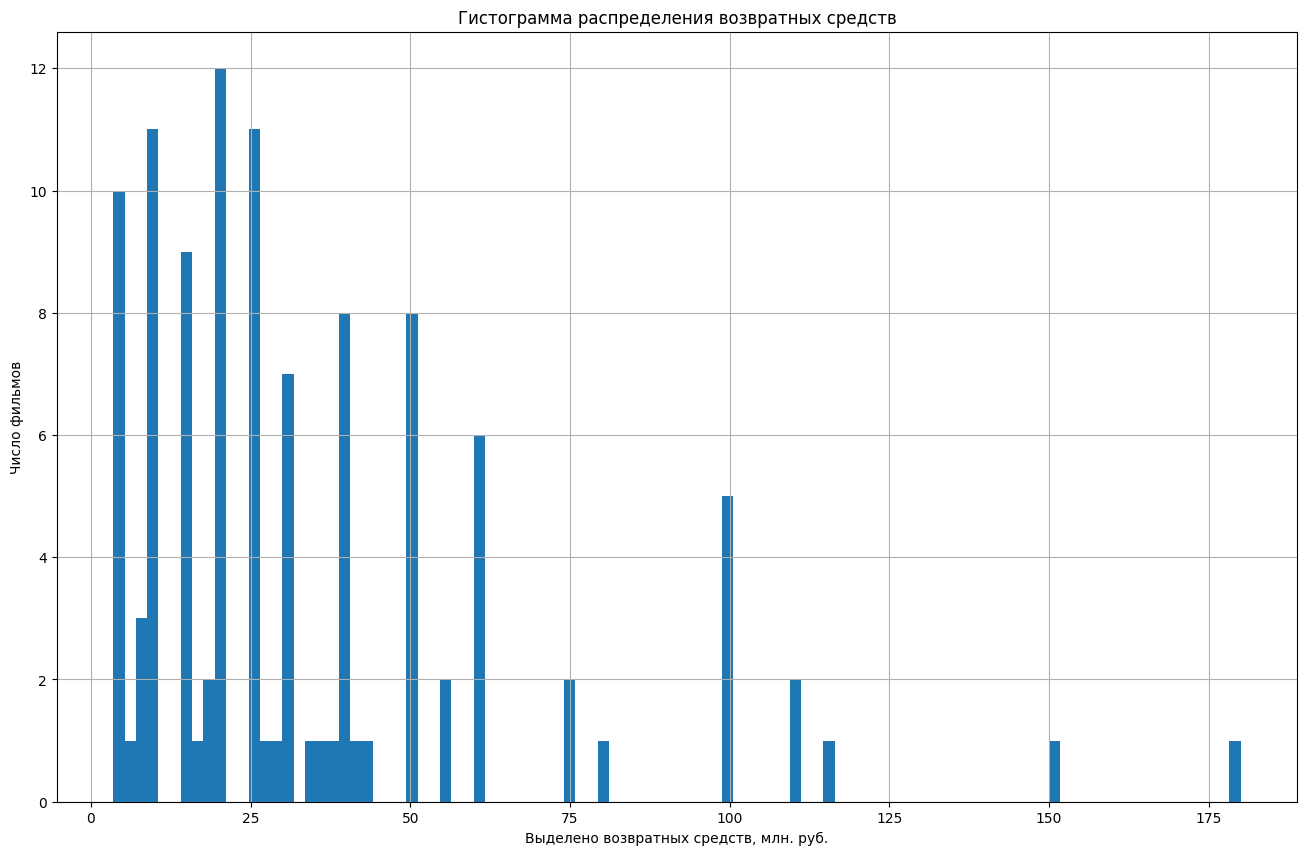

In [56]:
(df_refundable['refundable_support'] / 1000000).hist(bins=100, figsize=(16, 10))
plt.title('Гистограмма распределения возвратных средств')
plt.ylabel('Число фильмов')
plt.xlabel('Выделено возвратных средств, млн. руб.')
plt.show()

Подозрительных данных в столбце не обнаружено. Гистограмма показывает распределение Пуассона с резким подъемом от нуля, максимумом на 20 млн. рублей и длинным хвостом справа, который заканчивается на 180 млн. рублей.

Можем посмотреть для этой категории поддержки среднюю величину и медиану:

In [57]:
(df_refundable['refundable_support'] / 1000000).describe().round(1)

count    111.0
mean      35.5
std       32.0
min        3.5
25%       15.0
50%       25.0
75%       50.0
max      180.0
Name: refundable_support, dtype: float64

Средняя величина 35.5 млн. руб.  довольно сильно превышает медиану 25млн. руб. Это логичный результат для нашего распределения - слева сумма поддержки резко ограничивается нулем, а справа у нас длинный хвост, из-за чего среднее значение также смещается вправо.

То же самое посмотрим для столбца невозвращаемой поддержки:

In [58]:
df_nonrefundable = df.query('nonrefundable_support!=0')

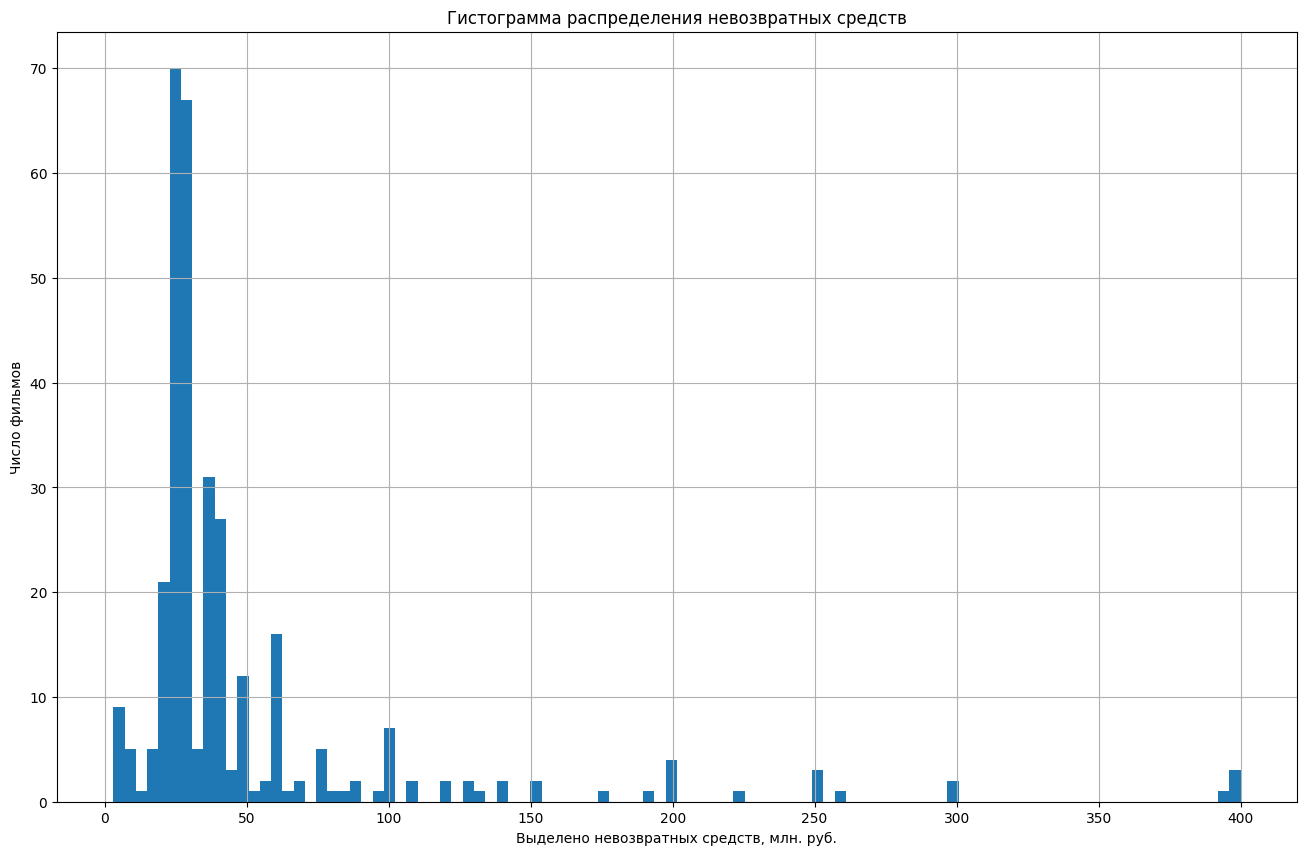

In [59]:
(df_nonrefundable['nonrefundable_support'] / 1000000).hist(bins=100, figsize=(16, 10))
plt.title('Гистограмма распределения невозвратных средств')
plt.ylabel('Число фильмов')
plt.xlabel('Выделено невозвратных средств, млн. руб.')
plt.show()

Здесь наблюдаем похожую картину, только пик гистограммы приходится на 25 млн. рублей, а максимум достигает 400 млн. рублей. Подозрительных данных не наблюдается.


In [60]:
(df_nonrefundable['nonrefundable_support'] / 1000000).describe().round(1)

count    323.0
mean      50.3
std       60.2
min        3.0
25%       25.0
50%       30.0
75%       45.0
max      400.0
Name: nonrefundable_support, dtype: float64

Разрыв между средним значением 50,3 и медианой 30 еще больше.

Посмотрим на бюджеты съемок фильмов:

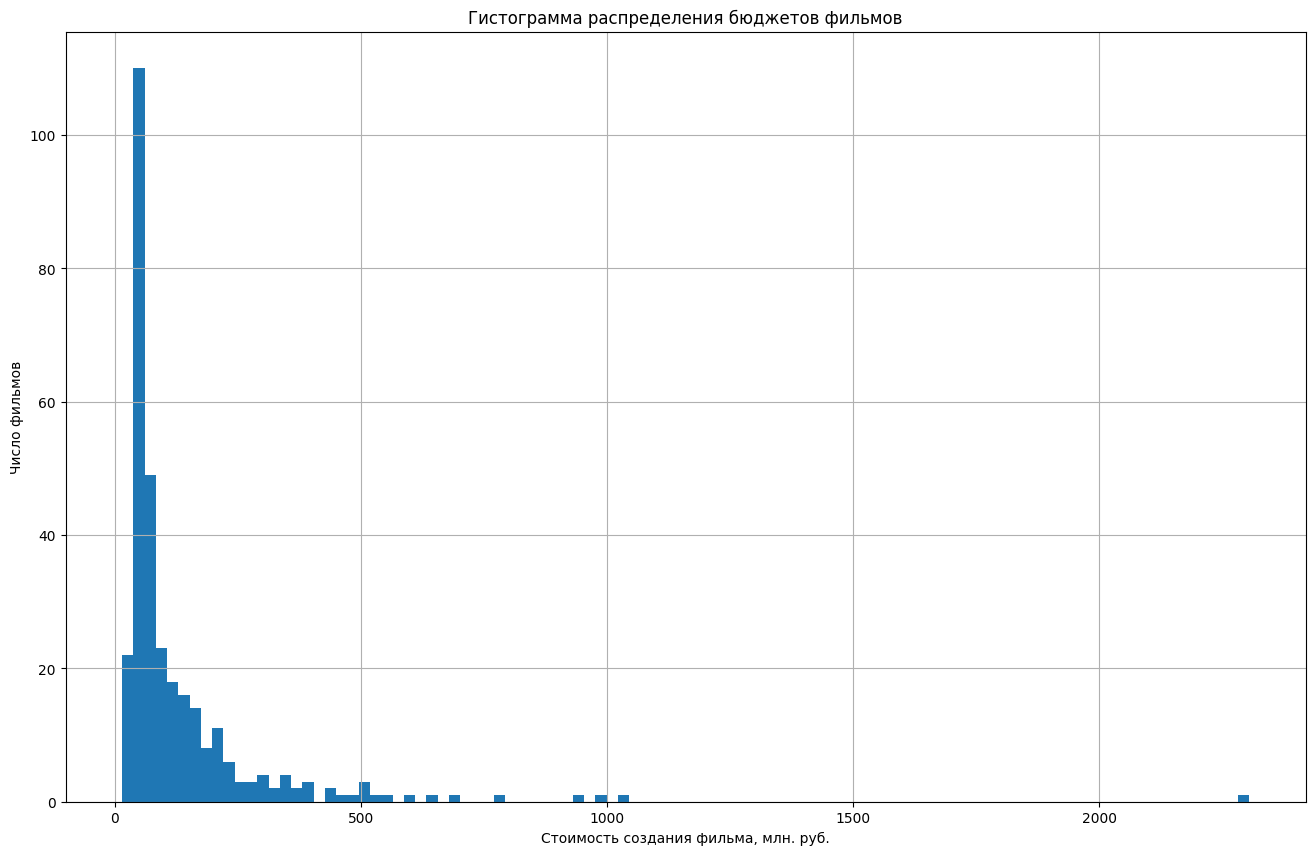

In [61]:
(df['budget'] / 1000000).hist(bins=100, figsize=(16, 10))
plt.title('Гистограмма распределения бюджетов фильмов')
plt.ylabel('Число фильмов')
plt.xlabel('Стоимость создания фильма, млн. руб.')
plt.show()

Характер распределения похожий на предыдущие гистограммы. В основном, максимальная сумма затрат на создание фильма не превышает 1 миллиард рублей, но есть одно выпадающее значение в районе 2,3 млрд. рублей. По средним показателям:

In [62]:
(df['budget'] / 1000000).describe().round(1)

count     315.0
mean      134.1
std       191.2
min        14.5
25%        46.2
50%        73.4
75%       150.0
max      2305.1
Name: budget, dtype: float64

Медиана затрат составляет 73,4 млн. рублей, среднее значение 134,1 млн. рублей.

Посмотрим на рейтинг:

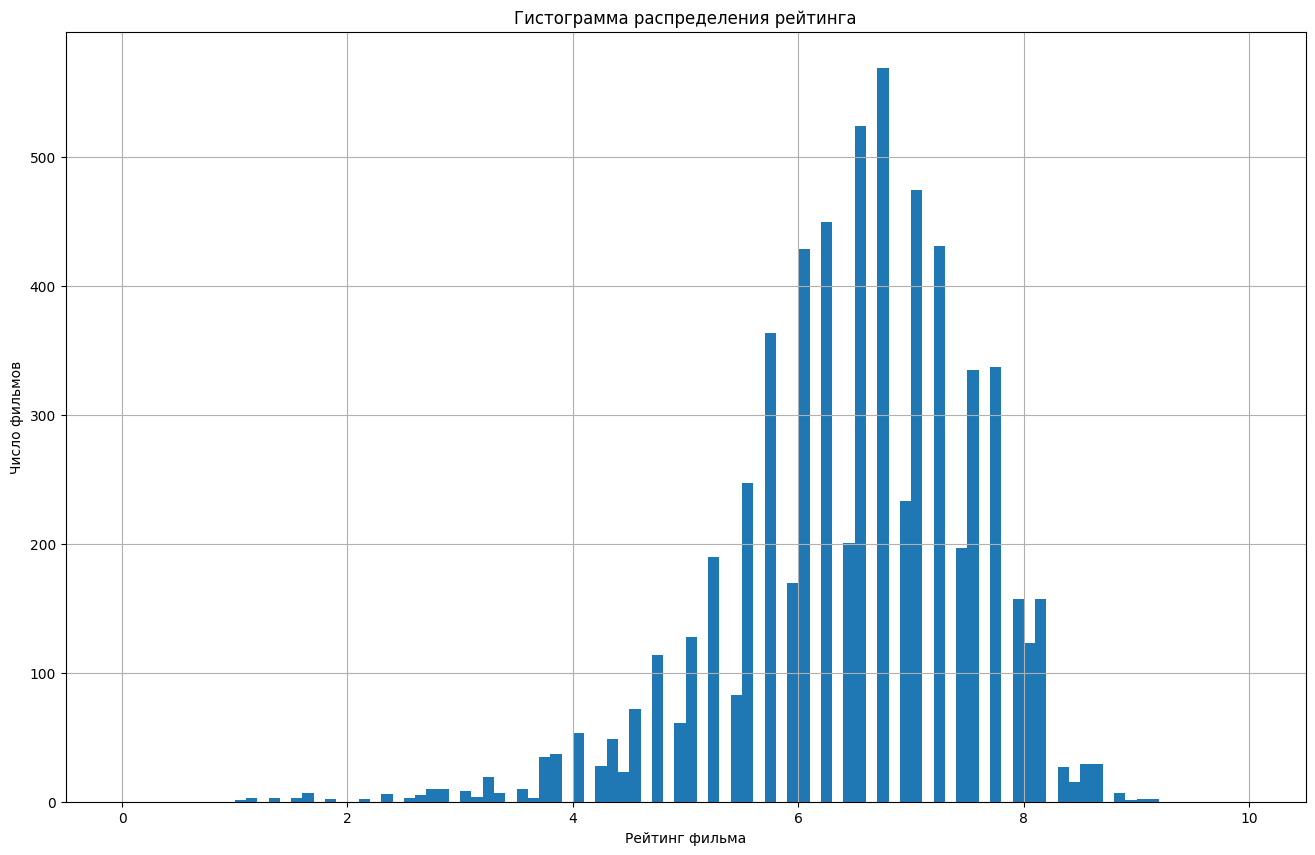

In [63]:
df['ratings'].hist(bins=100,  range=(0, 10), figsize=(16, 10))
plt.title('Гистограмма распределения рейтинга')
plt.ylabel('Число фильмов')
plt.xlabel('Рейтинг фильма')
plt.show()

Здесь мы видим обратную картину распределения, т.к. рейтинг ограничен 10 баллами и фильмы редко когда получают меньше 2 баллов рейтинга. Самая популярная оценка  - около 7 баллов.

Теперь посмотрим на столбец с кассовыми сборами. Общие данные посмотрим также в миллионах рублей:

In [64]:
# И отключим строки с нулевыми кассовыми сборами
(df.query('box_office>0')['box_office'] / 1000000).describe(). round(1)

count    3134.0
mean       77.1
std       241.2
min         0.0
25%         0.1
50%         2.4
75%        24.6
max      3073.6
Name: box_office, dtype: float64

Вот здесь творится что-то не понятное. Медиана 2,4 млн. руб. более чем в 30 раз меньше средних сборов - 77,1 млн. руб. Это говорит об очень неравномерном распределении данных по этому столбцу. Посмотрим на гистограмму:

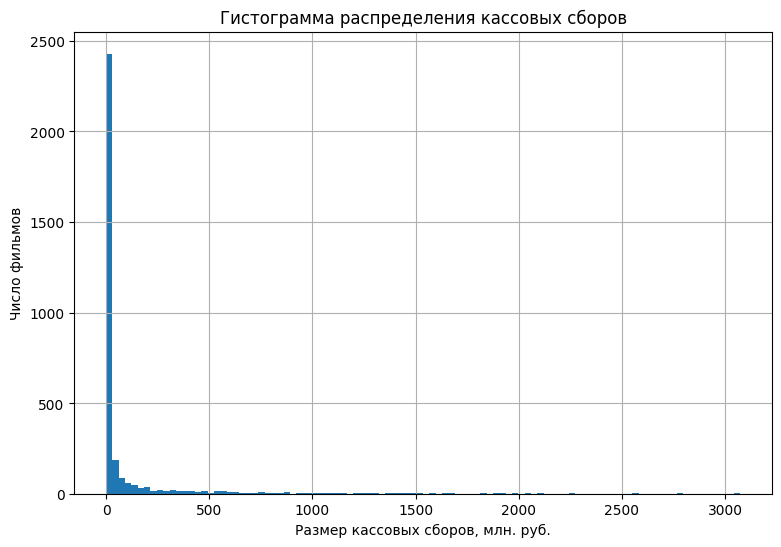

In [65]:
(df['box_office'] / 1000000).hist(bins=100, figsize=(9, 6))
plt.title('Гистограмма распределения кассовых сборов')
plt.ylabel('Число фильмов')
plt.xlabel('Размер кассовых сборов, млн. руб.')
plt.show()

Легче не стало. Ограничим сумму кассовых сборов:

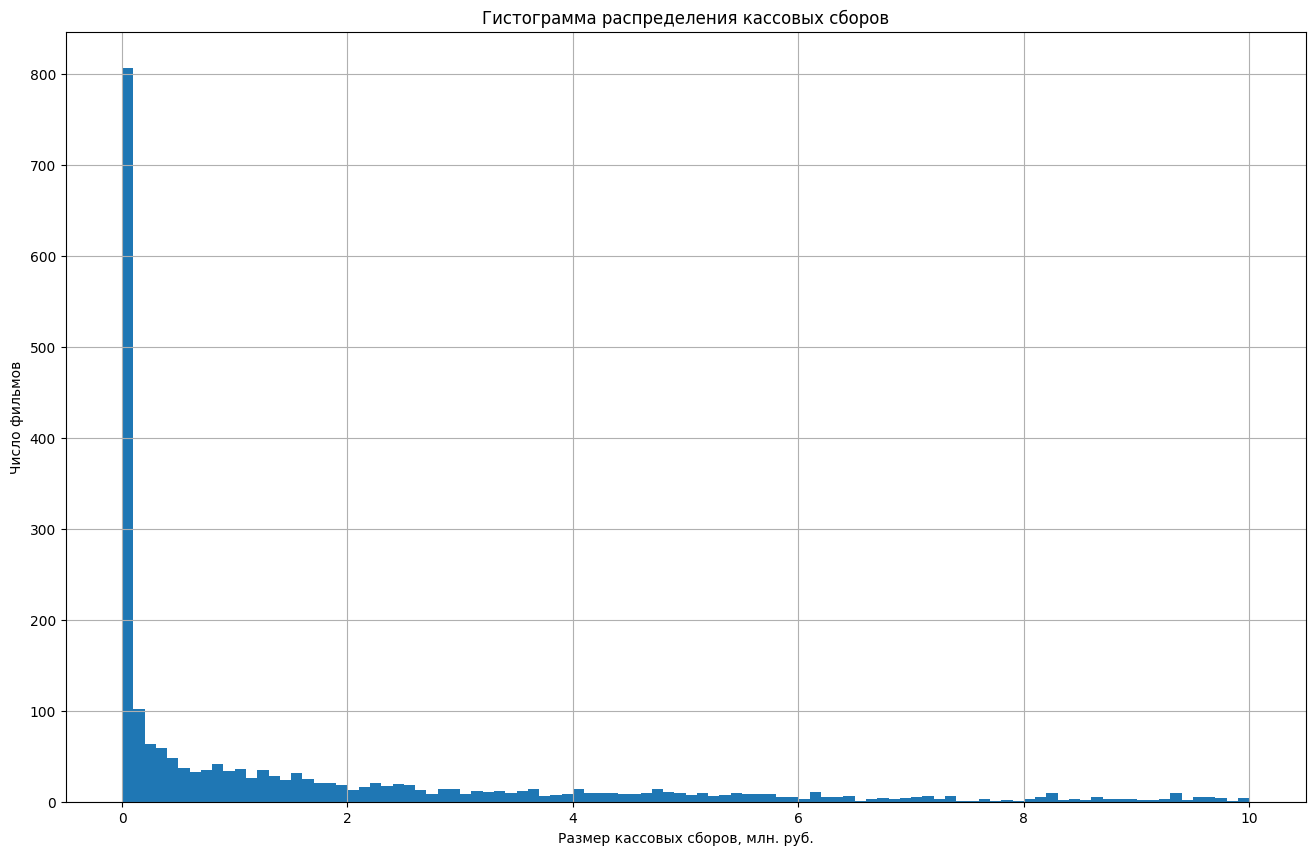

In [66]:
(df['box_office'] / 1000000).hist(bins=100, range=(0, 10), figsize=(16, 10))
plt.title('Гистограмма распределения кассовых сборов')
plt.ylabel('Число фильмов')
plt.xlabel('Размер кассовых сборов, млн. руб.')
plt.show()

Мы укоротили горизонтальную ось в 300 раз, но легче не стало. Видно, что основная масса фильмов собрала 100 тысяч рублей или менее. Сложно сказать, какой размер кассовых сборов можно считать адекватным. Наверно для художественных и анимационных фильмов он один, а для документальных - он совсем другой. Для начала, можно предположить, что условный средний фильм посмотрело в среднем 500 человек, заплатив при этом в среднем 200 рублей. Т.е. кассовые сборы за условный средний фильм составили 100 тысяч рублей. Посмотрим, какая доля фильмов ( из тех, для которых известен box_office) попадает в эту категорию:

In [67]:
len(df.query('box_office<=100000')) / len(df.query('box_office>0'))

0.25717932354818124

Почти 26%. Что-то многовато. Отсортируем таблицу по размеру кассы и выведем первые строки:

In [68]:
df.query('box_office>0').sort_values(by='box_office').head(10)

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
puNumber,,,,,,,,,,,,,,,
111006013,Жестокий романс,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Рязанов,NaN,«12+» - для детей старше 12 лет,0,0,NaN,NaN,8.1,"драма,мелодрама,история",40.0
111016714,Каменный цветок.,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Птушко,NaN,«0+» - для любой зрительской аудитории,0,0,NaN,NaN,7.1,"фэнтези,драма,мелодрама",50.0
121006410,22 пули: Бессмертный,2010-04-01 12:00:00+00:00,Художественный,Еуроп Корпорейшн,Франция,Ришар Бери,"Люк Бессон, Дидье Хорау, Пьер-Анж Ле Погам",«16+» - для детей старше 16 лет,0,0,NaN,NaN,7.1,"боевик,драма,криминал",75.0
121025012,Астерикс и Обеликс в Британии 3D,2012-10-05 12:00:00+00:00,Художественный,"Уайлд Банч, Фиделите Фильм, Филм Кайрос, Синет...",Франция-Италия-Испания-Венгрия,Лоран Тирар,"Оливье Делбоск, Марк Миссонье",«6+» - для детей старше 6 лет,0,0,NaN,NaN,5.6,"комедия,приключения,семейный",80.0
111006113,За спичками,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", ""СУОМИ-ФИЛЬМ""","СССР, Финляндия","Л.Гайдай, Р.Орко",NaN,«12+» - для детей старше 12 лет,0,0,NaN,NaN,7.5,"комедия,приключения,история",100.0
111009310,Ловец ветра,2010-10-21 12:00:00+00:00,Художественный,"ГУП РБ Киностудия ""Башкортостан""",Россия,А.Юмагулов,А.Юнусов,«16+» - для детей старше 16 лет,0,0,NaN,NaN,7.5,"драма,комедия",100.0
111018614,Одиноким предоставляется общежитие,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,С.Самсонов,NaN,«12+» - для детей старше 12 лет,0,0,NaN,NaN,7.8,"мелодрама,комедия",100.0
121023413,Лучшие дни впереди,2013-09-03 12:00:00+00:00,Художественный,"Ле Фильм дю Киоск, 27.11 Продюксьон, Директ си...",Франция,Марион Верну,"Франсуа Краус, Дени Пино-Валенсьенн",«16+» - для детей старше 16 лет,0,0,NaN,NaN,6.6,"драма,комедия",100.0
124000905,Волшебное приключение,2015-01-18 12:00:00+00:00,Анимационный,"Экшион Филмз, Патэ Синема, Болексбразерс",Великобритания - Франция,Дэйв Бортвик,"Клауди Горский, Энди Лэйтон, Лаурен Родон, Пас...",«0+» - для любой зрительской аудитории,0,0,NaN,NaN,5.7,"мультфильм,фэнтези,комедия",100.0


Значения начинаются с 40 рублей. Вряд ли их можно считать корректными. Попробуем выяснить что не так. Чтобы было проще ориентироваться в цифрах, создадим копию датафрейма, в котором значения в столбце кассовых сборов уменьшены в 1 млн. раз:

In [69]:
df_million = df
df_million['box_office'] = df['box_office'] / 1000000

И теперь посмотрим, как с течением времени менялась касса:

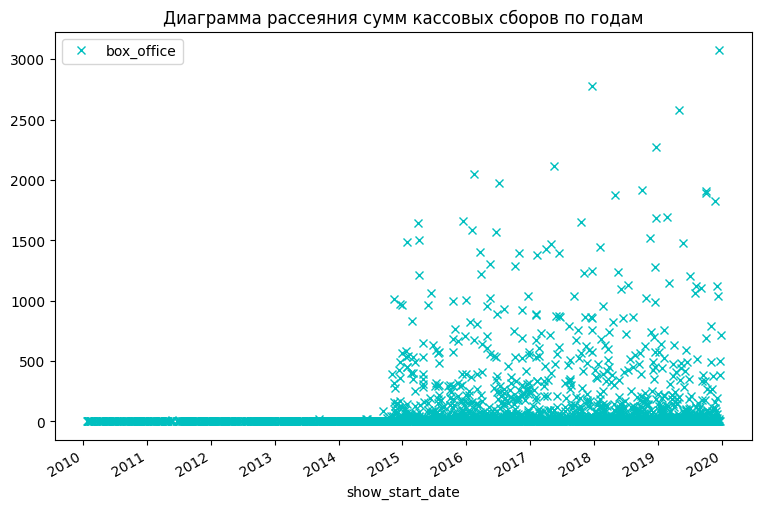

In [70]:
(df_million.plot(y='box_office', x='show_start_date', style='cx'
                 , figsize=(9, 6)
                 , title = 'Диаграмма рассеяния сумм кассовых сборов по годам')
);

И мы обнаруживаем интересную аномалию. Почему-то фильмы до конца 2014 года собирали совсем другие деньги нежели после этого. Собирали в десятки и даже сотни раз меньше. Попробуем немного (до 10 млн.) укоротить ось сборов:

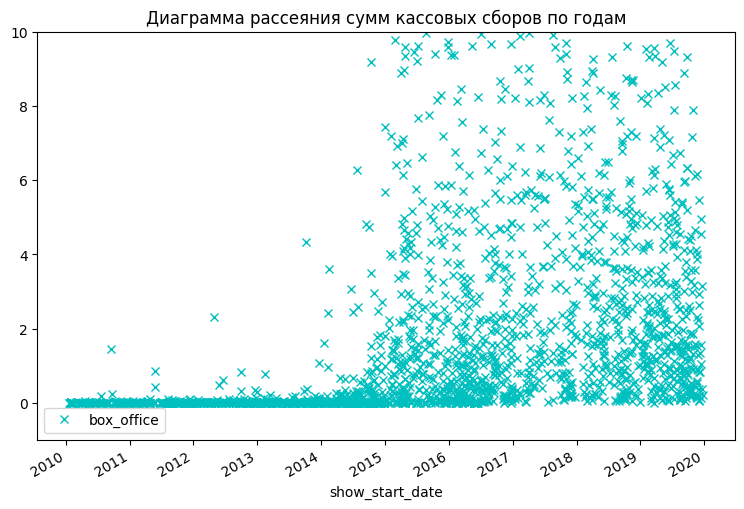

In [71]:
(df_million.plot(y='box_office', x='show_start_date', style='cx'
                 , figsize=(9, 6), ylim=(-1, 10)
                 , title = 'Диаграмма рассеяния сумм кассовых сборов по годам')
);

Уменьшим ось y еще больше, до 1 млн. рублей:

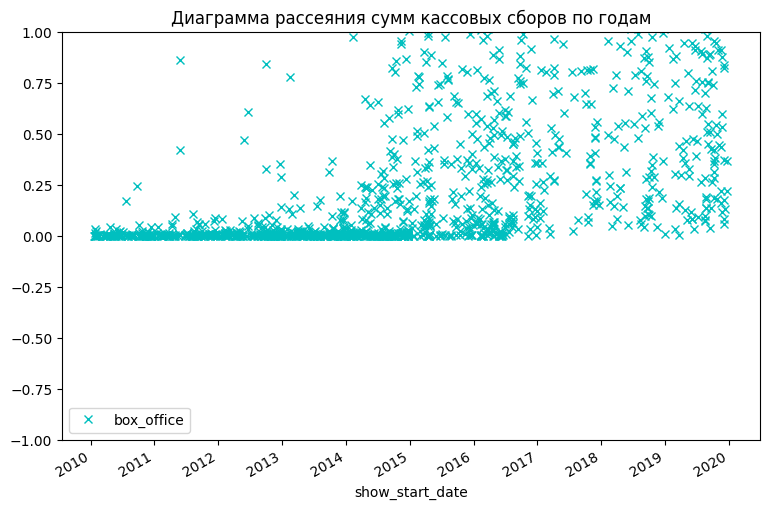

In [72]:
(df_million.plot(y='box_office', x='show_start_date', style='cx'
                 , figsize=(9, 6), ylim=(-1, 1)
                 , title = 'Диаграмма рассеяния сумм кассовых сборов по годам')
);

Теперь стала лучше видна эта аномалия, которая начинается с самого начала временного периода в 2010 году и обрывается где-то в середине 2016-го года - плотная область точек данных в районе нуля. После рассмотрения отдельных примеров с маленькими кассовыми сборами и сопоставления с данными, представленными на ресурсе "Кинопоиск", можно сделать вывод, что ошибки носят несистемный характер и достоверно привести их в норму не получится. Следовательно, на следующем шаге, когда мы будем исследовать данные по сборам, от этих аномальных значений необходимо будет избавиться.

Возможная причина полученных распределений в том, что информацию корректно и полноценно могли начать собирать именно с 2014 года, из-за чего мы видем такие странные значения.

### Добавление новых столбцов.

#### Год проката фильма.

В задании к сборному проекту нам предлагается для значений нового столбца выделить требуемый год из даты премьеры фильма. Единственная дата, которой мы располагаем, это дата выдачи прокатного удостоверения. Дату премьеры мы, к сожалению, не знаем.

У нас есть также номер прокатного удостоверения, по которому можно примерно сказать категорию фильма и где он был произведен - у нас или зарубежом. Точно определить по этому номеру, для чего было выдано удостоверение, мы не можем.

Поэтому, косвенно, можно только сказать, что раз фильм был в кинопрокате и у него стоит какая-то сумма сборов (сейчас не важна адекватность этой суммы, пусть даже там стоит ноль), мы можем в этих строках с указанными сборами поставить год премьерного показа, взяв его из даты выдачи удостоверения:

In [73]:
df['year'] = np.nan
df.loc[df['box_office']>=0, 'year'] =\
    df.loc[df['box_office']>=0, 'year'].fillna(df['show_start_date'].dt.year)

df.sort_values(by='year').head()

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
puNumber,,,,,,,,,,,,,,,,
121008610,Стать Джоном Ленноном,2010-05-05 12:00:00+00:00,Художественный,"Авер Медиа, Экосси Филмз, Филм 4, Норс Вест Ви...",Канада-Великобритания,Сэм Тейлор Вуд,"Роберт Бернштейн, Кевин Лоудер, Дуглас Рэй",«16+» - для детей старше 16 лет,0,0,NaN,NaN,7.5,"драма,мелодрама,биография",0.000000,2010.0
121017310,"Ешь, молись, люби /По книге Элизабет Гилберт/",2010-10-04 12:00:00+00:00,Художественный,"Коламбиа Пикчерз, План Би Интертейнмент, Индия...",США,Райан Мерфи,Диди Гарднер,«16+» - для детей старше 16 лет,0,0,NaN,NaN,6.8,"драма,мелодрама,биография",0.000240,2010.0
111007310,Воробей-,2010-08-09 12:00:00+00:00,Художественный,"ООО ""Центр-Студия национального фильма ""XXI век""",Россия,Ю.Шиллер,"А.Гундоров, А.Малечкин, С.Линников",«12+» - для детей старше 12 лет,0,0,NaN,NaN,5.5,"боевик,триллер,драма",0.005355,2010.0
111007810,"Око за око (по мотивам повести Б.Лавренева ""Се...",2010-08-23 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Покровские Ворота"" совместн...",Россия,Г.Полока,"Р.Шарабидзе, И.Поршнев",«16+» - для детей старше 16 лет,0,0,NaN,NaN,NaN,NaN,0.010685,2010.0
124000910,Шевели ластами 3D,2010-07-29 12:00:00+00:00,Анимационный,"Нью Вейв Пикчерз, Иллюмината Пикчерз, Моушн Ин...",США-Бельгия,Бен Стассен,"Джина Галло, Мими Майнард, Доминик Парис",«0+» - для любой зрительской аудитории,0,0,NaN,NaN,6.7,"мультфильм,приключения,семейный",0.001010,2010.0


Посмотрим, что в итоге получилось.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 221048915 to 124010719
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   show_start_date        7486 non-null   datetime64[ns, UTC]
 2   type                   7486 non-null   object             
 3   film_studio            7468 non-null   object             
 4   production_country     7484 non-null   object             
 5   director               7477 non-null   object             
 6   producer               6918 non-null   object             
 7   age_restriction        7486 non-null   object             
 8   refundable_support     7486 non-null   int32              
 9   nonrefundable_support  7486 non-null   int32              
 10  budget                 315 non-null    float64            
 11  financing_source       332 non-null    obje

Вроде все верно - количество заполненных строк в столбцах box_office и year совпадает.

#### Главный режиссер фильма.

Новый столбец main_director заполним подстрокой, взятой до первой запятой в соответствующей строке столбца director:

In [75]:
if df['director'].str.contains(',').any():
    df['main_director'] = df['director'].str.extract('(.+?),')
    
df['main_director'] = df['main_director'].fillna(df['director'])

#### Основной жанр фильма.

Аналогично для жанра:

In [76]:
if df['genres'].str.contains(',').any():
    df['main_genre'] = df['genres'].str.extract('(.+?),')
    
df['main_genre'] = df['main_genre'].fillna(df['genres'])

Посмотрим теперь, до какого числа сократилось количество жанров (ранее их было 742):

In [77]:
len(df['main_genre'].unique())

29

Теперь их 29, включая NaN. Такой столбец также можно отнести к категориальным данным.

Посмотрим на результат добавления новых столбцов:

In [78]:
df.head(10)

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
puNumber,,,,,,,,,,,,,,,,,,
221048915,Открытый простор,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,NaN,Кевин Костнер,боевик
111013716,Особо важное задание,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0,0,NaN,NaN,6.6,"драма,военный",NaN,NaN,Е.Матвеев,драма
221038416,Особо опасен,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,Тимур Бекмамбетов,фантастика
221026916,Особо опасен,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,Тимур Бекмамбетов,фантастика
221030815,Особо опасен,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,Тимур Бекмамбетов,фантастика
111013816,Остановился поезд,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,0,0,NaN,NaN,7.7,драма,NaN,NaN,В.Абдрашитов,драма
111007013,Любовь и голуби,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,0,0,NaN,NaN,8.3,"мелодрама,комедия",0.0027,2013.0,В.Меньшов,мелодрама
221074614,Любовь и сигареты,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,0,0,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,NaN,Джон Туртурро,мюзикл
121011416,Отпетые мошенники.,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,0,0,NaN,NaN,8.0,"комедия,криминал",NaN,NaN,Эрик Беснард,комедия


#### Доля государственной поддержки в бюджете фильма.

In [79]:
df['fund_support'] = np.nan
df.loc[df['budget']>0, 'fund_support'] =\
    (df.loc[df['budget']>0, 'refundable_support'] + 
    df.loc[df['budget']>0, 'nonrefundable_support']
    )/df.loc[df['budget']>0, 'budget']

df.sort_values(by='fund_support', ascending=False).head()

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,fund_support
puNumber,,,,,,,,,,,,,,,,,,,
111018816,О любви (2017),2016-12-28 12:00:00+00:00,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",Россия,В.Бортко,Н.Бортко,«16+» - для детей старше 16 лет,20000000,35000000,70086439.0,"Министерство культуры, Фонд кино",NaN,NaN,11.332412,2016.0,В.Бортко,NaN,0.784745
111018515,Наследники (2015),2015-10-22 12:00:00+00:00,Художественный,"Культурный фонд ""Кино-телекомпания ""Православн...",Россия,В.Хотиненко,"С.Кравец, В.Хотиненко",«16+» - для детей старше 16 лет,7153119,28000000,50218741.0,"Министерство культуры, Фонд кино",6.1,"мюзикл,фэнтези,комедия",0.194780,2015.0,В.Хотиненко,мюзикл,0.700000
111007016,Преображение (2015),2016-04-08 12:00:00+00:00,Художественный,"ООО ""АБС""",Россия,"Т.Воронецкая, Д.Сергин",Е.Белова,«16+» - для детей старше 16 лет,0,26000000,37142857.0,Министерство культуры,5.7,ужасы,0.056800,2016.0,Т.Воронецкая,ужасы,0.700000
111003314,Бесславные придурки,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857.0,Министерство культуры,NaN,NaN,0.028140,2014.0,А.Якимчук,NaN,0.700000
111000315,Экспириенс,2015-01-13 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,Е.Татаров,А.Тютрюмов,«16+» - для детей старше 16 лет,0,26000000,37142857.0,Министерство культуры,4.7,драма,0.036550,2015.0,Е.Татаров,драма,0.700000


## Исследовательский анализ данных по кинопрокату.

Согласно определению, данному в Википедии, Кинопрокат - это массовый показ фильмов (кинопоказ) в сети кинотеатров.

Относительно показа в кинотеатрах мы располагаем только данными о кассовых сборах, следовательно, в своих рассуждениях мы будем исходить из того, что фильмы, по которым нет информации о сборах, такие фильмы в кинотеатрах не демонстрировались.

### Изучение полноты представленных данных.

Количество фильмов, выходивших в прокат каждый год:

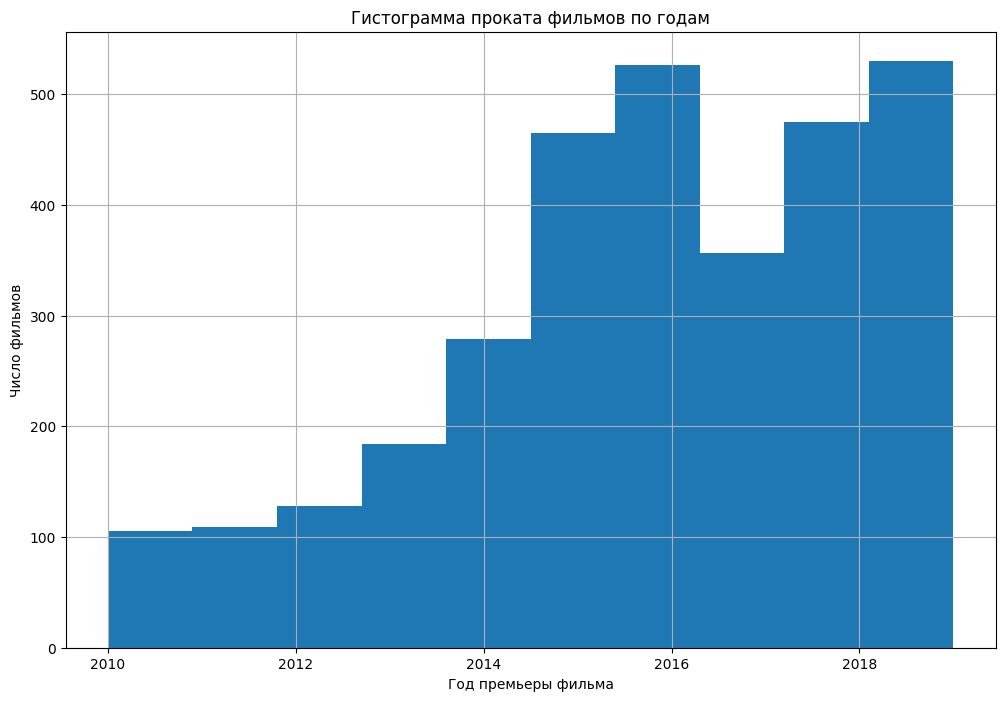

In [80]:
df['year'].hist(bins=10, figsize=(12, 8))
plt.title('Гистограмма проката фильмов по годам')
plt.ylabel('Число фильмов')
plt.xlabel('Год премьеры фильма')
plt.show()

Мы видим, что в первые три года наблюдений (2010-2012) выходило в прокат порядка 100 фильмов в год. Далее произошел резкий рост (с 2013 по 2016) от 200 фильмов в год до 500. В 2017-м году по каким-то причинам кол-во премьер снизилось до 350 фильмов. В последние два года наблюдений число фильмов находится в районе 500.

Создадим еще один столбец с годом выдачи прокатного удостоверения. Здесь мы не будем ограничивать заполнение этого столбца только строками с информацией о кинопрокате (как мы это сделали ранее).

In [81]:
df['puNumber_year'] = df['show_start_date'].dt.year

Мы помним, что один фильм может встречаться в таблице несколько раз, в соответствии с числом выданных удостоверений. Мало того, год выдачи удостоверений может отличаться. Чтобы посмотреть распределение фильмов по годам, нам необходимо избавиться от дублирования фильмов. В качестве года в таком случае имеет смысл выбрать год самого раннего удостоверения из указанных в датафрейме:

In [82]:
df_film_unique = df.pivot_table(index='title', values='puNumber_year', aggfunc='min')
df_film_unique.head()

,puNumber_year
title,
Я ПРЕПОД,2018
"""SOS"" над тайгой",2014
"""V"" значит вендетта",2010
"""АРТиШОК"" анимационный альманах авторских фильмов",2019
"""Бежин луг"" Сергея Эйзенштейна",2015


Теперь можем посмотреть на гистограмму выхода фильмов по годам:

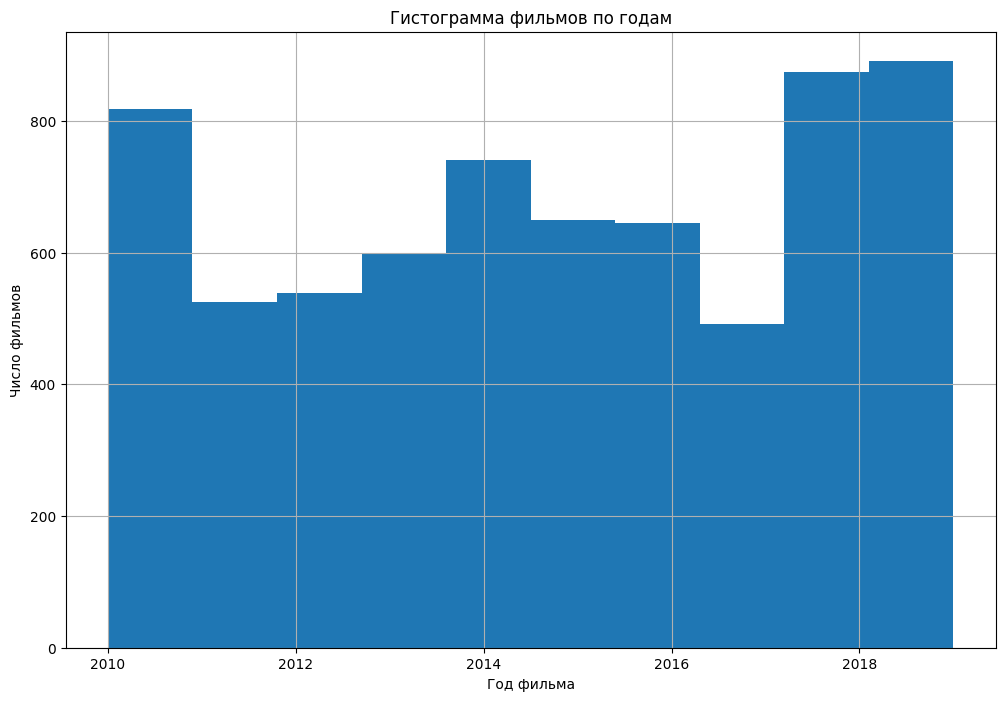

In [83]:
df_film_unique['puNumber_year'].hist(bins=10, figsize=(12, 8))
plt.title('Гистограмма фильмов по годам')
plt.ylabel('Число фильмов')
plt.xlabel('Год фильма')
plt.show()

Выглядит иначе, чем первая гистограмма.

В целом, если посмотреть на долю фильмов из кинопроката по отношению к общему числу фильмов, мы получим:

In [84]:
df['year'].count() / len(df_film_unique)

0.4663319551092735

Фильмов с данными о кинопрокате менее половины. Примерно 46,6%.

Теперь посмотрим как эта доля менялась по годам. Для этого используем две сборные таблицы. Одну, для полного перечня фильмов, мы уже собрали. Вторую, для фильмов с кассовыми сборами, сделаем сейчас:

In [85]:
df_box_year = df.pivot_table(index='year', values='box_office', aggfunc='count')
df_box_year

,box_office
year,
2010.0,105
2011.0,109
2012.0,128
2013.0,184
2014.0,279
2015.0,465
2016.0,526
2017.0,357
2018.0,475


У нас теперь есть две таблицы, в которых нужно увидеть соответствующее число фильмов по годам. Вторая таблица уже готова, а первую нужно еще немного видоизменить. Сбросим для нее индекс и сгруппируем ее заново по годам:

In [86]:
df_film_unique = df_film_unique.reset_index()
df_film_unique = df_film_unique.pivot_table(index='puNumber_year', values='title', aggfunc='count')
df_film_unique

,title
puNumber_year,
2010,818
2011,525
2012,538
2013,598
2014,741
2015,649
2016,645
2017,492
2018,875


И, наконец, объединим таблицы и посчитаем долю фильмов с прокатом от общего числа за каждый год:

In [87]:
df_box_year['title'] = df_film_unique['title']
df_box_year['ratio'] = df_box_year['box_office'] / df_box_year['title']
df_box_year

,box_office,title,ratio
year,,,
2010.0,105,818,0.128362
2011.0,109,525,0.207619
2012.0,128,538,0.237918
2013.0,184,598,0.307692
2014.0,279,741,0.376518
2015.0,465,649,0.716487
2016.0,526,645,0.815504
2017.0,357,492,0.725610
2018.0,475,875,0.542857


Построим график:

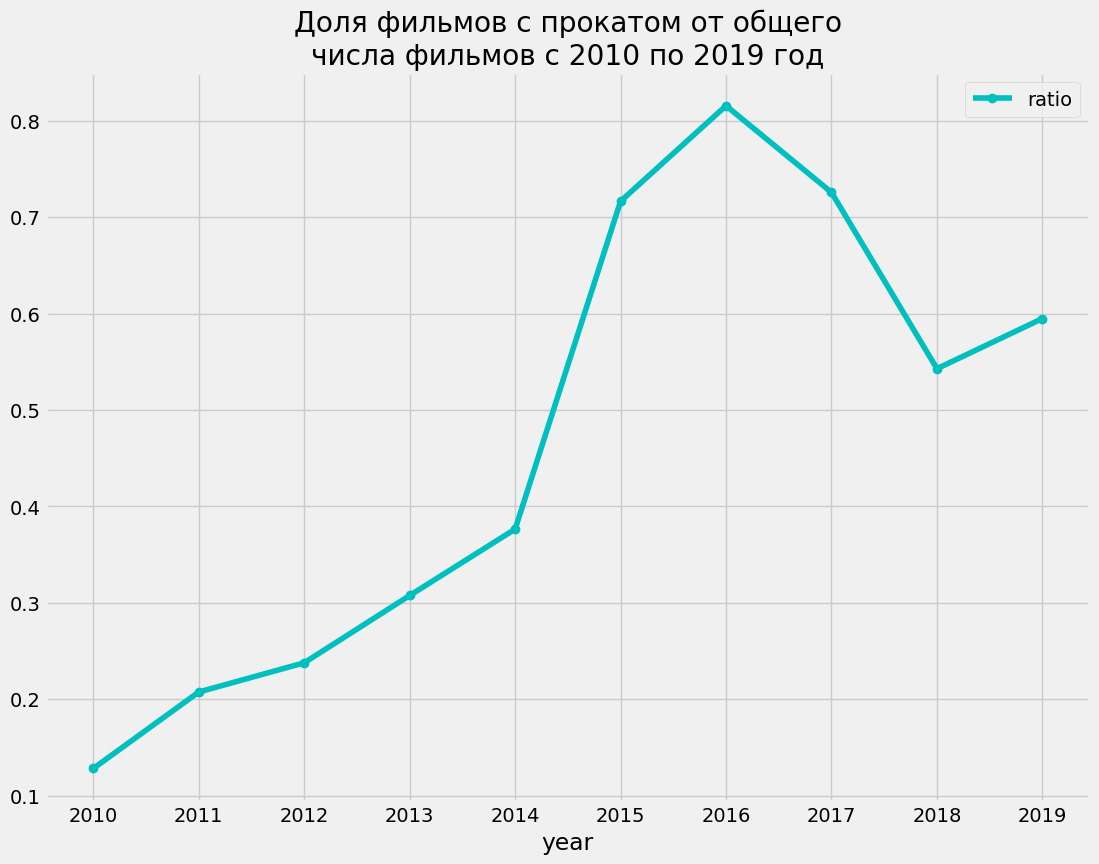

In [88]:
plt.style.use('fivethirtyeight')
(df_box_year.plot(y='ratio', style='co-', figsize=(12, 9), 
    xticks=range(2010, 2020), 
    grid=True, title = 'Доля фильмов с прокатом от общего\nчисла фильмов с 2010 по 2019 год')
);

Мы видим, что с 2010 по 2016 год доля фильмов с информацией о прокате росла с 13% до 82%. Наиболее полно представлен 2016 год

### Анализ суммы сборов по годам.

Ранее, когда мы изучали количественные данные, была обнаружена аномалия в столбце кассовых сборов. Теперь необходимо исключить ошибочные данные, которые могут негативно повлиять на статистику кинопроката.

Посмотрим еще раз на распределение кассовых сборов по годам:

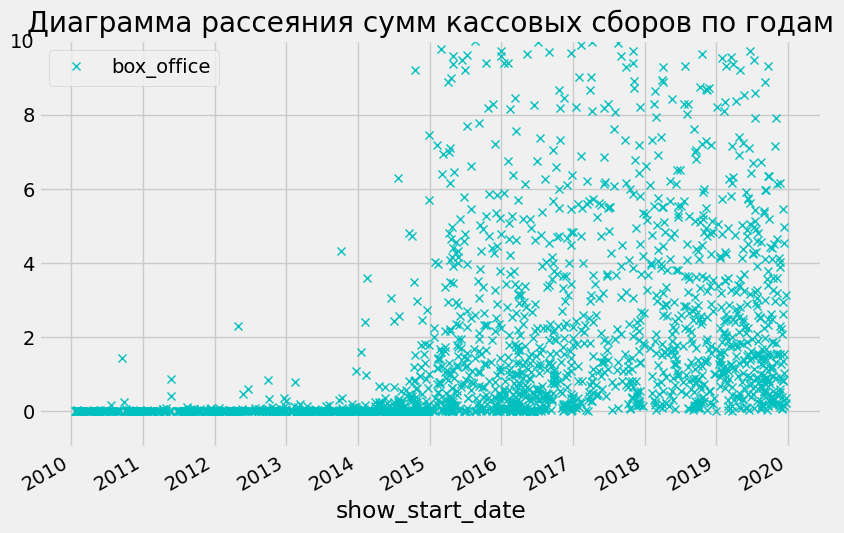

In [89]:
(df_million.plot(y='box_office', x='show_start_date', style='cx'
                 , figsize=(9, 6), ylim=(-1, 10)
                 , title = 'Диаграмма рассеяния сумм кассовых сборов по годам')
);

Мы видим, что примерно до середины 2014 года картина кассовых сборов вряд ли отражает реальную ситуацию. Данные ошибочны. Поэтому можно предложить ограничить рассмотрение кинопроката годами с 2015-го по 2019-й.

In [90]:
df_kassa = df_million.query('(year>=2015)&(box_office>0)')

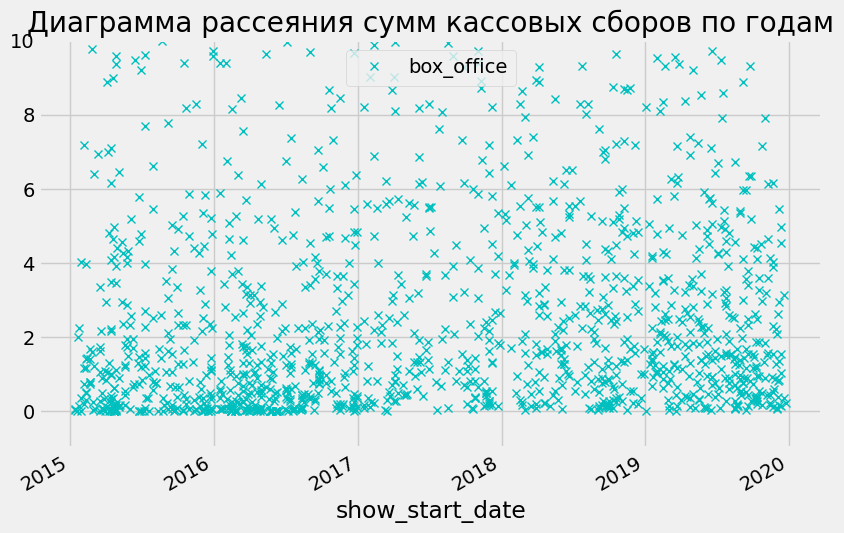

In [91]:
(df_kassa.plot(y='box_office', x='show_start_date', style='cx'
                 , figsize=(9, 6), ylim=(-1, 10)
                 , title = 'Диаграмма рассеяния сумм кассовых сборов по годам')
);

Посмотрим, как менялась сумма сборов по годам:

In [92]:
df_kassa_sum = df_kassa.pivot_table(index='year', values='box_office', aggfunc='sum')
df_kassa_sum.round(1)

,box_office
year,
2015.0,39497.4
2016.0,47866.3
2017.0,48563.7
2018.0,49668.4
2019.0,48425.7


Построим график по сводной таблице:

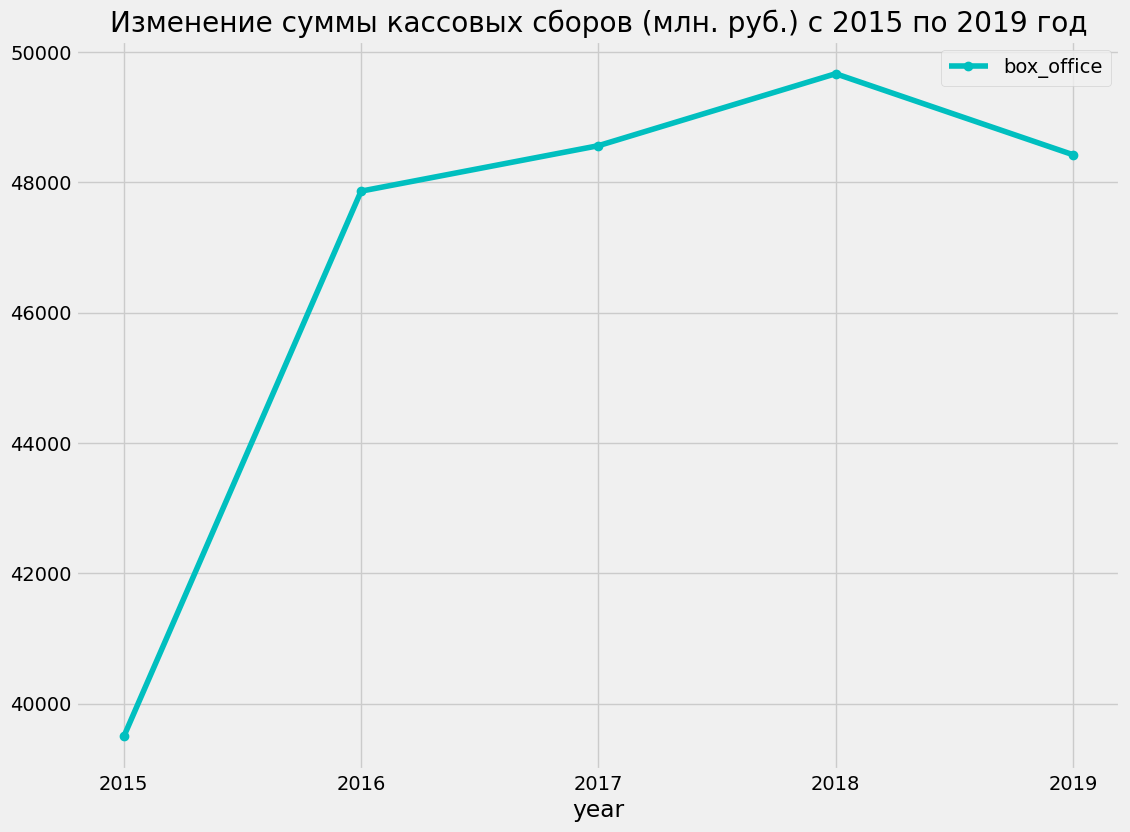

In [93]:
(df_kassa_sum.plot(style='co-', figsize=(12, 9), 
    xticks=range(2015, 2020), 
    grid=True, title = 'Изменение суммы кассовых сборов (млн. руб.) с 2015 по 2019 год')
);

Сумма росла с 2015 по 2018 год, в 2019-м произошел небольшой откат. Минимальное значение было в 2015 году, максимальное в 2018.

Посчитаем среднюю и медианную сумму сборов для каждого года:

In [94]:
df_kassa_mm = df_kassa.pivot_table(index='year', values='box_office', aggfunc={'mean', 'median'})
df_kassa_mm

,mean,median
year,,
2015.0,85.492132,5.003450
2016.0,91.173904,3.915041
2017.0,136.032793,9.968340
2018.0,104.565059,8.891102
2019.0,91.369262,4.627798


Построим график для наглядности:

Text(0.5, 1.0, 'Средняя и медианная сумма сборов\nпо годам, млн. рублей')

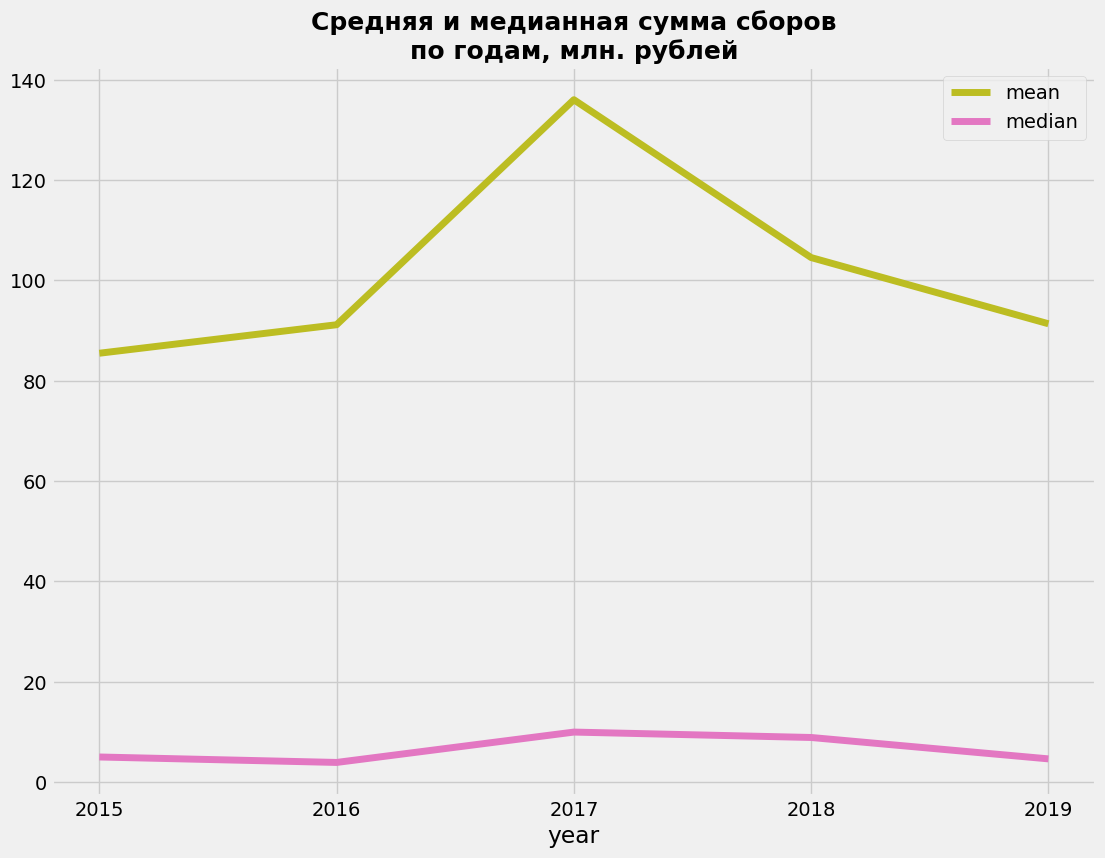

In [95]:
(df_kassa_mm.plot(style='-', figsize=(12, 9), linewidth=5.0,
    xticks=range(2015, 2020), color=['#bcbd22', '#e377c2'], fontsize=14,
    grid=True)
)
plt.title('Средняя и медианная сумма сборов\nпо годам, млн. рублей', fontsize=18, fontweight='bold')

Разрыв между средним значением и медианой очень большой. Они отличаются в 10 и более раз. Это означает, что данные распределены очень неравномерно - фильмы с небольшими кассовыми сборами составляют существенную долю от общего числа.

Да, и в то время как малоприбыльные фильмы занижают уровень медианы, фильмы, имеющие кассовый успех увеличивают показания среднего значения.

### Влияние возрастных ограничений на суммы сборов.

Посмотрим на то как возрастные ограничения влияли на общие суммы сборов за период с 2015 по 2019 год:

Возьмем таблицу с ненулевыми кассовыми сборами:

In [96]:
df_kassa.head()

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,fund_support,puNumber_year
puNumber,,,,,,,,,,,,,,,,,,,,
111003616,Неподдающиеся,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,0,0,NaN,NaN,8.0,"мелодрама,комедия",0.00036,2016.0,Ю.Чулюкин,мелодрама,NaN,2016
111003716,Неподсуден,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,0,0,NaN,NaN,7.7,драма,0.00042,2016.0,В.Краснопольский,драма,NaN,2016
111005815,Асса,2015-04-23 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,С.Соловьев,NaN,«16+» - для детей старше 16 лет,0,0,NaN,NaN,6.0,"фэнтези,боевик",0.08472,2015.0,С.Соловьев,фэнтези,NaN,2015
111005515,Американская дочь,2015-04-23 12:00:00+00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,NaN,«6+» - для детей старше 6 лет,0,0,NaN,NaN,7.0,"драма,комедия",0.00030,2015.0,К.Шахназаров,драма,NaN,2015
111005915,Аттестат зрелости,2015-04-23 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Т.Лукашевич,NaN,«12+» - для детей старше 12 лет,0,0,NaN,NaN,6.9,драма,0.06750,2015.0,Т.Лукашевич,драма,NaN,2015


Создадим сборную таблицу, сгруппировав данные по возрастным категориям. Чтобы понять, фильмы каких категорий приносят больший доход, выведем общую сумму сборов по этим категориям и среднюю сумму сборов на фильм в категории.

In [97]:
df_age = df_kassa.pivot_table(index='age_restriction', values='box_office', aggfunc=['sum', 'mean', 'count'])
df_age

,sum,mean,count
,box_office,box_office,box_office
age_restriction,,,
«0+» - для любой зрительской аудитории,809.077426,8.989749,90
«12+» - для детей старше 12 лет,60619.446628,174.695812,347
«16+» - для детей старше 16 лет,76034.733644,94.688336,803
«18+» - запрещено для детей,40759.615572,51.464161,792
«6+» - для детей старше 6 лет,55798.610800,176.020854,317


Мы видим, что фильмы в категориях 6+ и 12+ смотрит существенно большее число зрителей. Это можно объяснить например тем, что поход в кино является довольно распространенным способом семейного отдыха и на детские фильмы билеты обычно покупаются на всю семью (взрослых и детей). А условная "молодеж", т.е. группа людей от 16-ти лет и до возраста формирования семьи с детьми, не так часто ходит в кинотеатр (и в меньшем составе) и зачастую предпочитает другие формы досуга. Тем не менее суммарные цифры сборов для условно детской и взрослой аудиторий совпадают. Это объясняется гораздо большим числом "взрослых" фильмов.

Добавим в нашу таблицу еще информацию по годам:

In [98]:
df_age_year = df_kassa.pivot_table(index=['age_restriction', 'year'], values='box_office', aggfunc=['sum', 'mean', 'count'])
df_age_year

sum        mean  \
                                                 box_office  box_office   
age_restriction                        year                               
«0+» - для любой зрительской аудитории 2015.0    379.054578    9.975120   
                                       2016.0    150.228849    3.664118   
                                       2017.0    229.598930   76.532977   
                                       2018.0     32.449002    6.489800   
                                       2019.0     17.746067    5.915356   
«12+» - для детей старше 12 лет        2015.0  13616.082009  189.112250   
                                       2016.0  12204.446524  148.834714   
                                       2017.0   7851.427661  191.498236   
                                       2018.0  14267.291661  212.944652   
                                       2019.0  12680.198774  149.178809   
«16+» - для детей старше 16 лет        2015.0  11368.120870   68.072580   
                                       2016.0  16664.548542   92.069329   
                                       2017.0  18745.042900  154.917710   
                                       2018.0  16503.602347  105.792323   
                                       2019.0  12753.418985   71.648421   
«18+» - запрещено для детей            2015.0   5432.308367   41.153851   
                                       2016.0   6793.929819   44.992913   
                                       2017.0   9651.495581   65.656433   
                                       2018.0   8760.085501   48.939025   
                                       2019.0  10121.796304   55.310362   
«6+» - для детей старше 6 лет          2015.0   8701.799371  164.184894   
                                       2016.0  12053.146008  172.187800   
                                       2017.0  12086.142146  268.580937   
                                       2018.0  10104.974623  148.602568   
                                       2019.0  12852.548651  158.673440   

                                                   count  
                                              box_office  
age_restriction                        year               
«0+» - для любой зрительской аудитории 2015.0         38  
                                       2016.0         41  
                                       2017.0          3  
                                       2018.0          5  
                                       2019.0          3  
«12+» - для детей старше 12 лет        2015.0         72  
                                       2016.0         82  
                                       2017.0         41  
                                       2018.0         67  
                                       2019.0         85  
«16+» - для детей старше 16 лет        2015.0        167  
                                       2016.0        181  
                                       2017.0        121  
                                       2018.0        156  
                                       2019.0        178  
«18+» - запрещено для детей            2015.0        132  
                                       2016.0        151  
                                       2017.0        147  
                                       2018.0        179  
                                       2019.0        183  
«6+» - для детей старше 6 лет          2015.0         53  
                                       2016.0         70  
                                       2017.0         45  
                                       2018.0         68  
                                       2019.0         81

Построим линейную диаграмму для суммы сборов в зависимости от категории и года. Для этого немного скорректируем сводную таблицу:

In [99]:
# Вычислим только сумму сборов
df_year_age = df_kassa.pivot_table(index=['year', 'age_restriction'], values='box_office', aggfunc='sum')
# Превратим сводную таблицу в обычную
df_year_age.reset_index()
# Перегруппируем данные так, чтобы превратить возрастные категории в столбцы
df_year_age = df_year_age.pivot_table(index='year', columns='age_restriction', values='box_office')
df_year_age

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2015.0,379.054578,13616.082009,11368.120870,5432.308367,8701.799371
2016.0,150.228849,12204.446524,16664.548542,6793.929819,12053.146008
2017.0,229.598930,7851.427661,18745.042900,9651.495581,12086.142146
2018.0,32.449002,14267.291661,16503.602347,8760.085501,10104.974623
2019.0,17.746067,12680.198774,12753.418985,10121.796304,12852.548651


Построим наглядный график:

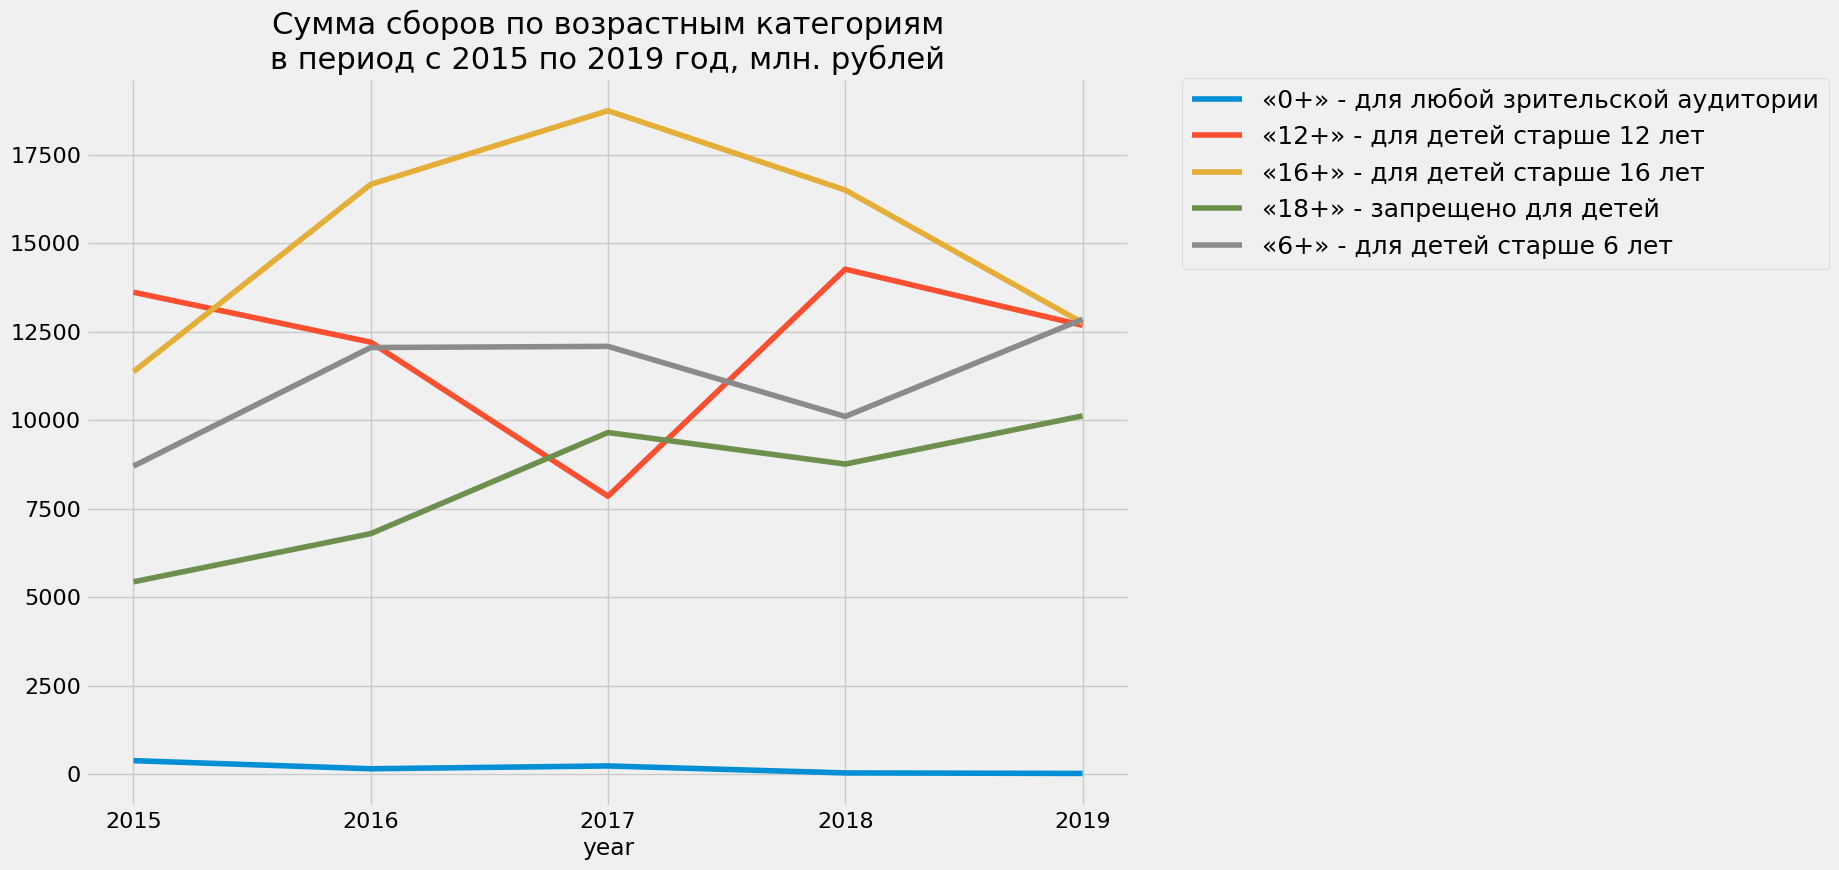

In [100]:
(df_year_age.plot(figsize=(12, 9),
    xticks=range(2015, 2020), fontsize=16,
    grid=True)
)
plt.title('Сумма сборов по возрастным категориям\nв период с 2015 по 2019 год, млн. рублей', fontsize=22)
plt.legend(fontsize=18, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.style.use('fivethirtyeight')

Сложно добавить что-либо еще к сказанному выше. Каких-либо системных изменений в картине сборов с течением времени не выявлено.

## Исследование фильмов, получивших государственную поддержку.

Отфильтруем данные так, чтобы остались только фильмы с государственным участием:

In [101]:
df_state_support = df.query('(refundable_support>0)|(nonrefundable_support>0)')
df_state_support.sort_values(by='fund_support', ascending=False)

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,fund_support,puNumber_year
puNumber,,,,,,,,,,,,,,,,,,,,
111018816,О любви (2017),2016-12-28 12:00:00+00:00,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",Россия,В.Бортко,Н.Бортко,«16+» - для детей старше 16 лет,20000000,35000000,70086439.0,"Министерство культуры, Фонд кино",NaN,NaN,11.332412,2016.0,В.Бортко,NaN,0.784745,2016
111018515,Наследники (2015),2015-10-22 12:00:00+00:00,Художественный,"Культурный фонд ""Кино-телекомпания ""Православн...",Россия,В.Хотиненко,"С.Кравец, В.Хотиненко",«16+» - для детей старше 16 лет,7153119,28000000,50218741.0,"Министерство культуры, Фонд кино",6.1,"мюзикл,фэнтези,комедия",0.194780,2015.0,В.Хотиненко,мюзикл,0.700000,2015
111007016,Преображение (2015),2016-04-08 12:00:00+00:00,Художественный,"ООО ""АБС""",Россия,"Т.Воронецкая, Д.Сергин",Е.Белова,«16+» - для детей старше 16 лет,0,26000000,37142857.0,Министерство культуры,5.7,ужасы,0.056800,2016.0,Т.Воронецкая,ужасы,0.700000,2016
111003314,Бесславные придурки,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857.0,Министерство культуры,NaN,NaN,0.028140,2014.0,А.Якимчук,NaN,0.700000,2014
111000315,Экспириенс,2015-01-13 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,Е.Татаров,А.Тютрюмов,«16+» - для детей старше 16 лет,0,26000000,37142857.0,Министерство культуры,4.7,драма,0.036550,2015.0,Е.Татаров,драма,0.700000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111012117,Селфи,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Н.Хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,20000000,40000000,NaN,Фонд кино,5.8,"триллер,драма",225.196400,2018.0,Н.Хомерики,триллер,NaN,2018
114001018,Два хвоста,2018-05-31 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"В.Ровенский, Н.Лопато, В.Азеев","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,10000000,60000000,NaN,Фонд кино,5.0,"мультфильм,детский",106.514301,2018.0,В.Ровенский,мультфильм,NaN,2018
114003018,Принцесса и дракон,2018-08-23 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,М.Нефедова,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,40000000,40000000,NaN,Фонд кино,5.2,"мультфильм,фэнтези,детский",83.366329,2018.0,М.Нефедова,мультфильм,NaN,2018


In [102]:
df_state_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 111005313 to 111023119
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   show_start_date        332 non-null    datetime64[ns, UTC]
 2   type                   332 non-null    object             
 3   film_studio            332 non-null    object             
 4   production_country     332 non-null    object             
 5   director               332 non-null    object             
 6   producer               330 non-null    object             
 7   age_restriction        332 non-null    object             
 8   refundable_support     332 non-null    int32              
 9   nonrefundable_support  332 non-null    int32              
 10  budget                 315 non-null    float64            
 11  financing_source       332 non-null    objec

Посмотрим на суммарную поддержку, а также на ее средний размер в зависимости от источника финансирования. Чтобы было легче ориентироваться в цифрах, переведем соответствующие столбцы рублей в миллионы рублей:

In [103]:
df_state_support_m = df_state_support
df_state_support_m['refundable_support'] = df_state_support_m['refundable_support'] / 1000000
df_state_support_m['nonrefundable_support'] = df_state_support_m['nonrefundable_support'] / 1000000
df_state_support_m['budget'] = df_state_support_m['budget'] / 1000000

df_refund_support = \
(
df_state_support_m.pivot_table(index='financing_source',
values=['refundable_support', 'nonrefundable_support'], 
aggfunc=['sum', 'mean'])
)

df_refund_support.round(1)

C:\Users\ivano\AppData\Local\Temp\ipykernel_9408\45532898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_support_m['refundable_support'] = df_state_support_m['refundable_support'] / 1000000
C:\Users\ivano\AppData\Local\Temp\ipykernel_9408\45532898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_support_m['nonrefundable_support'] = df_state_support_m['nonrefundable_support'] / 1000000
C:\Users\ivano\AppData\Local\Temp\ipykernel_9408\45532898.py:4: SettingWithCopyWarning: 
A value i

sum                     \
                                 nonrefundable_support refundable_support   
financing_source                                                            
Министерство культуры                           4836.7                0.0   
Министерство культуры, Фонд кино                 859.9              325.5   
Фонд кино                                      10565.1             3613.5   

                                                  mean                     
                                 nonrefundable_support refundable_support  
financing_source                                                           
Министерство культуры                             29.5                0.0  
Министерство культуры, Фонд кино                  39.1               14.8  
Фонд кино                                         72.4               24.8

Мы видим, что Министерство культуры использует только один тип поддержки фильмов - невозвратный, и средний размер такой поддержки составляет около 30 млн.руб. Общий размер поддержки за 10 лет составил около 5 млрд.рублей.

Фонд кино за указанный период выделил 14 млрд.рублей на фильмы, и это почти в три раза больше, чем выделило Министерство культуры. Также, около четверти общей суммы Фонд кино давал с условием возврата выделенных средств. Средний размер невозвратной поддержки составлял 72 млн.руб., а возвратной - 25 млн.руб.

Наконец, совместная поддержка. Она используется гораздо реже первых двух вариантов. Общий размер около 1,2 млрд.руб. Средний размер невозвратной поддержки 39 млн.руб., возвратной - 15 млн.руб.

Посмотрим на гистограмму процентов поддержки от бюджетов фильмов.

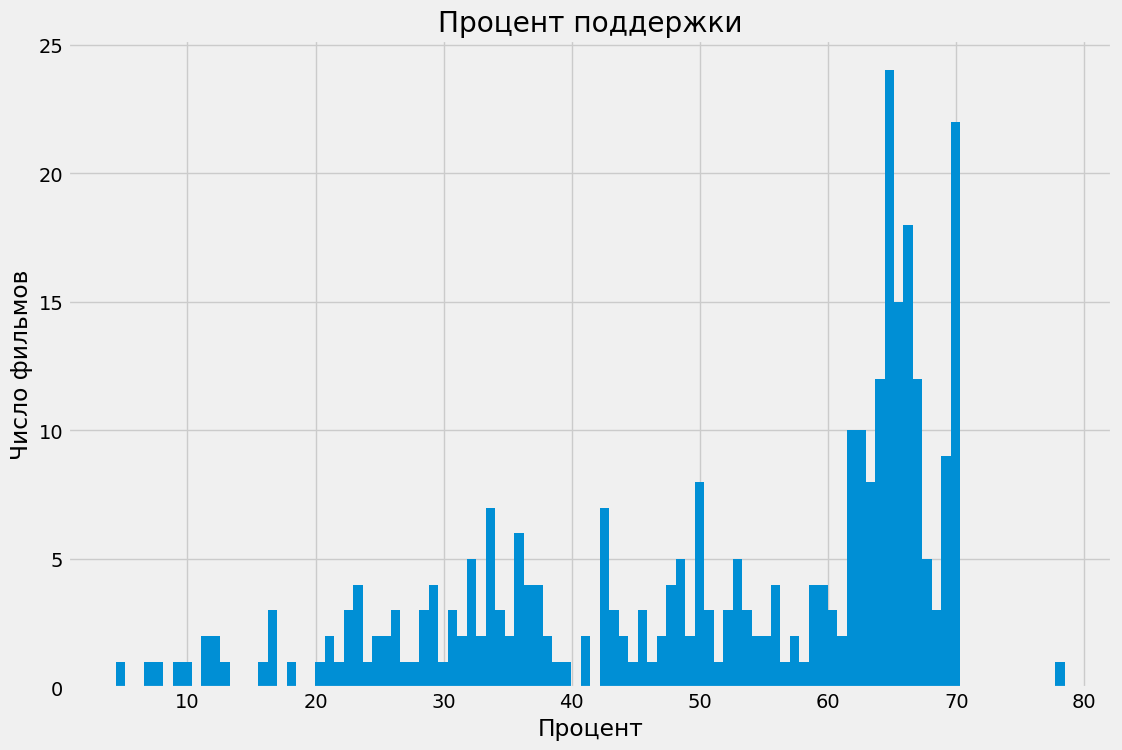

In [104]:
(df_state_support_m['fund_support']*100).hist(bins=100, figsize=(12, 8))
plt.title('Процент поддержки')
plt.ylabel('Число фильмов')
plt.xlabel('Процент')
plt.show()

Мы видим, что максимальным процентом поддержки можно считать уровень в 70%. Правда на гистограмме мы видим один случай на 77%, но это скорее исключение.

В основном, фильмы получают 60-70 процентов государственной поддержки.

Примерно такое же количество фильмов финансируются государством на 30-60 процентов.

И небольшая часть получает поддержку менее 30%.

Посмотрим, есть ли какая-то связь между долей поддержки и возрастной категорией фильма:

In [105]:
df_state_support_age = df_state_support_m.pivot_table(index='age_restriction', values='fund_support')
df_state_support_age

,fund_support
age_restriction,
«0+» - для любой зрительской аудитории,0.396834
«12+» - для детей старше 12 лет,0.515391
«16+» - для детей старше 16 лет,0.544733
«18+» - запрещено для детей,0.512372
«6+» - для детей старше 6 лет,0.484814


В целом, разницы особой нет, в среднем, доля поддержки находится в районе 50% для всех возрастных категорий, кроме совсем "малышовой", которая около 40%.

Посмотрим похожую таблицу для возрастных категорий и бюджетов фильмов:

In [106]:
df_state_support_age_b = df_state_support_m.pivot_table(index='age_restriction', values='budget', aggfunc={'mean', 'count'})
df_state_support_age_b

,count,mean
age_restriction,,
«0+» - для любой зрительской аудитории,8,112.873073
«12+» - для детей старше 12 лет,103,148.077146
«16+» - для детей старше 16 лет,118,97.572813
«18+» - запрещено для детей,27,83.364339
«6+» - для детей старше 6 лет,59,208.828920


Кстати, если сюда добавить информацию по средним кассовым сборам, то можно будет увидеть картину окупаемости фильмов по возрастным категориям:

In [107]:
df_state_support_age_b_b = df_state_support_m.pivot_table(index='age_restriction', values=['box_office', 'budget'])
df_state_support_age_b_b

,box_office,budget
age_restriction,,
«0+» - для любой зрительской аудитории,110.586551,112.873073
«12+» - для детей старше 12 лет,199.579638,148.077146
«16+» - для детей старше 16 лет,63.820522,97.572813
«18+» - запрещено для детей,20.005669,83.364339
«6+» - для детей старше 6 лет,205.907565,208.828920


Да), в целом, картина для российского кино печальная. Детские категории (0+, 6+, 12+) еще как-то стараются держаться на плаву и категория 12+ даже показывает какую-то прибыль. Но наше взрослое кино похоже переживает не лучшие времена. Одну из причин мы уже обсуждали выше - взрослый человек (без семьи) обычно выбирает другой способ отдыха (клубы, бары, рестораны, дачи и т.д.). Ну и главное, это конечно то, что российские кинематографисты просто еще не научились делать серьезное кино, способное привлечь в кинотеатры миллионы зрителей.

По окупаемости можно еще добавить, что создатели фильма получают не более 40% от проката (если верить информации в поисковиках). А в таком случае, все наши категории глубоко убыточны.

Все-таки, давайте верить в лучшее - должны же существовать отдельные коммерчески успешные фильмы. Создадим еще один столбец в котором вычислим во сколько раз кассовые сборы превышают бюджет фильма:

In [108]:
df_state_support_m['profit'] = df_state_support_m['box_office'] / df_state_support_m['budget']

C:\Users\ivano\AppData\Local\Temp\ipykernel_9408\1378363088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_support_m['profit'] = df_state_support_m['box_office'] / df_state_support_m['budget']


И посмотрим, есть ли у нас фильмы, где этот коэффициент равен 2,5 или выше:

In [109]:
df_support_profit = df_state_support_m.query('profit>=2.5')
df_support_profit.sort_values(by='profit', ascending=False)

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,...,financing_source,ratings,genres,box_office,year,main_director,main_genre,fund_support,puNumber_year,profit
puNumber,,,,,,,,,,,,,,,,,,,,,
111021719,Холоп,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25.0,35.000,...,Фонд кино,6.8,комедия,3073.568691,2019.0,К.Шипенко,комедия,0.375000,2019,19.209804
111000518,Лёд,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25.0,60.000,...,Фонд кино,NaN,NaN,1445.731798,2018.0,О.Трофим,NaN,0.572062,2018,9.729984
111001618,Я худею,2018-03-07 12:00:00+00:00,Художественный,"ООО ""Друг Друга"", ООО ""Ди Пи Джи""",Россия,А.Черномазов (псевдоним Алексей Нужный),"С.Корнихин, Н.Куликов, А.Черномазов, А.Кремер,...",«16+» - для детей старше 16 лет,0.0,30.000,...,Министерство культуры,6.9,комедия,633.462267,2018.0,А.Черномазов (псевдоним Алексей Нужный),комедия,0.342274,2018,7.227251
111018216,"Гуляй, Вася !",2016-12-20 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Инвада Фильм"", АО ""ВБД Груп""",Россия,Р.Каримов,"А.Новиков, А.Котелевский, Э.Илоян, Д.Жалинский...",«16+» - для детей старше 16 лет,0.0,25.345,...,Министерство культуры,6.5,комедия,259.099078,2016.0,Р.Каримов,комедия,0.649872,2016,6.643566
111017815,Самый Лучший День,2015-10-14 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,А.Першин (псевдоним Ж.Крыжовников),"Т.Бекмамбетов, А.Першин (псевдоним Ж.Крыжовник...",«16+» - для детей старше 16 лет,29.0,34.000,...,Фонд кино,4.7,"комедия,музыка",683.029061,2015.0,А.Першин (псевдоним Ж.Крыжовников),комедия,0.482318,2015,5.229157
111014914,8 новых свиданий,2014-10-30 12:00:00+00:00,Художественный,"ООО ""Смарт ТВ Продакшн""",Россия,М.Бальчюнас,"ООО ""Грин Филмс"", ООО ""ПЦ ""Горад""",«12+» - для детей старше 12 лет,0.0,30.000,...,Фонд кино,6.0,комедия,393.344626,2014.0,М.Бальчюнас,комедия,0.387588,2014,5.081857
111011617,Ёлки Новые,2017-12-21 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская",«6+» - для детей старше 6 лет,50.0,50.000,...,Фонд кино,5.8,"комедия,мелодрама",855.451052,2017.0,Д.Киселев,комедия,0.573454,2017,4.905618
111016018,Непрощенный,2018-09-27 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Большое кино""",Россия,С.Андреасян,"С.Андреасян, Г.Андреасян, А.Ананикян",«16+» - для детей старше 16 лет,0.0,40.000,...,Министерство культуры,6.7,драма,393.279629,2018.0,С.Андреасян,драма,0.484867,2018,4.767206
111011817,Движение вверх,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400.000,...,Фонд кино,7.5,"спорт,драма",2779.686144,2017.0,А.Мегердичев,спорт,0.677745,2017,4.709798


А что, не так уж и плохо, 25 фильмов. Надежда на российский кинематограф еще не умерла окончательно)).

Выходит, можем снимать отличные, высокорейтинговые фильмы! Стоп. А что у них с рейтингом?

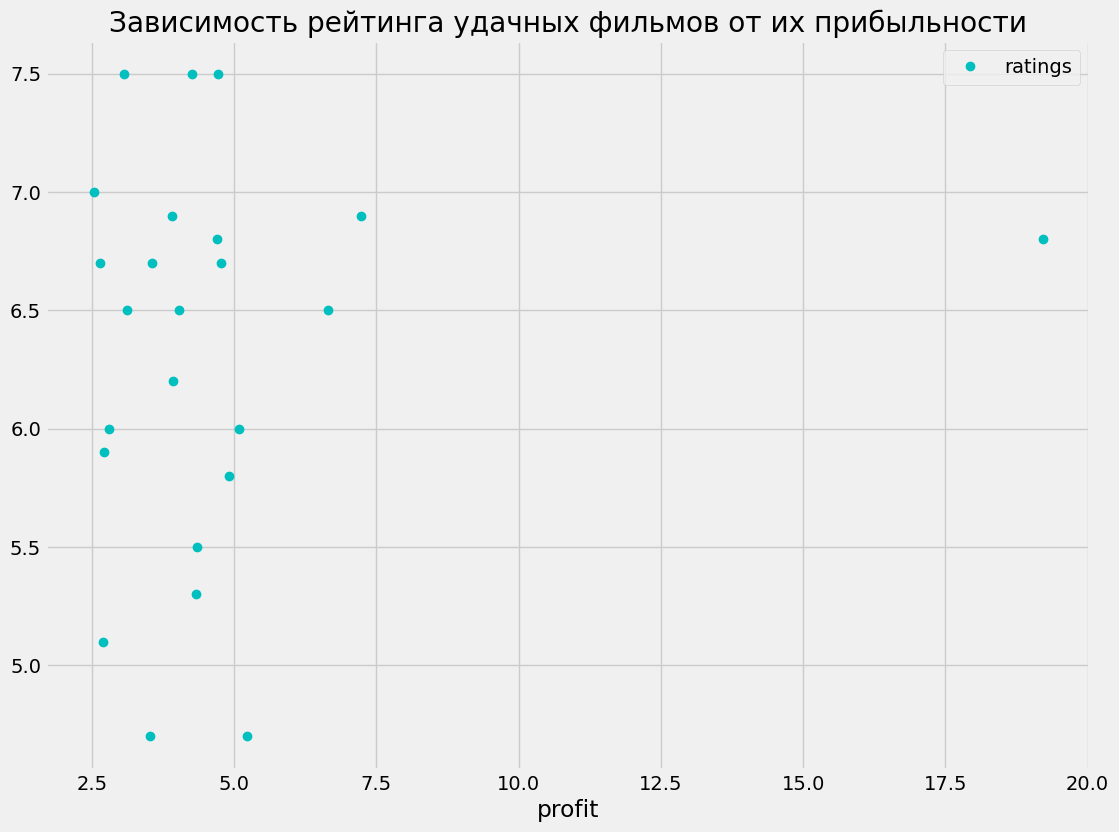

In [110]:
(df_support_profit.plot(y='ratings', x='profit', style='co'
                 , figsize=(12, 9)
                 , title = 'Зависимость рейтинга удачных фильмов от их прибыльности')
);

 Так, а если по всем российским фильмам с гос. поддержкой посмотреть?

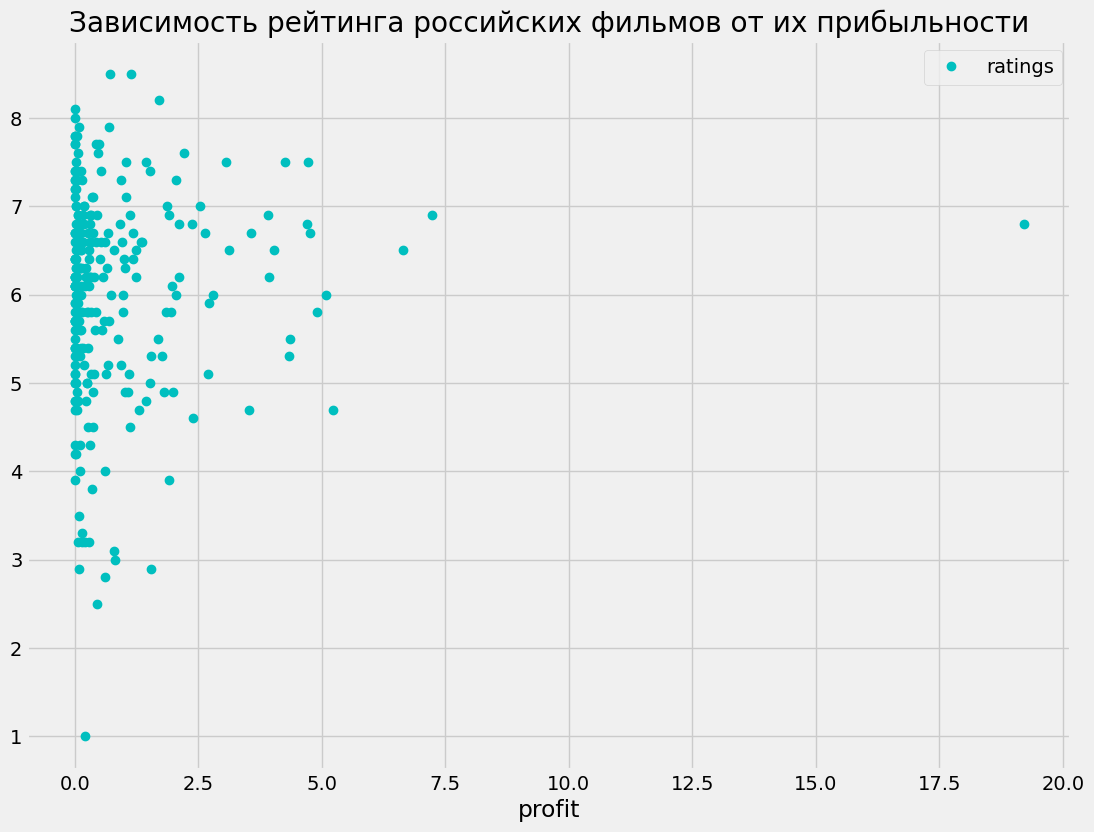

In [111]:
(df_state_support_m.plot(y='ratings', x='profit', style='co'
                 , figsize=(12, 9)
                 , title = 'Зависимость рейтинга российских фильмов от их прибыльности')
);

Так, "Холоп" мешает, посмотрим без него:

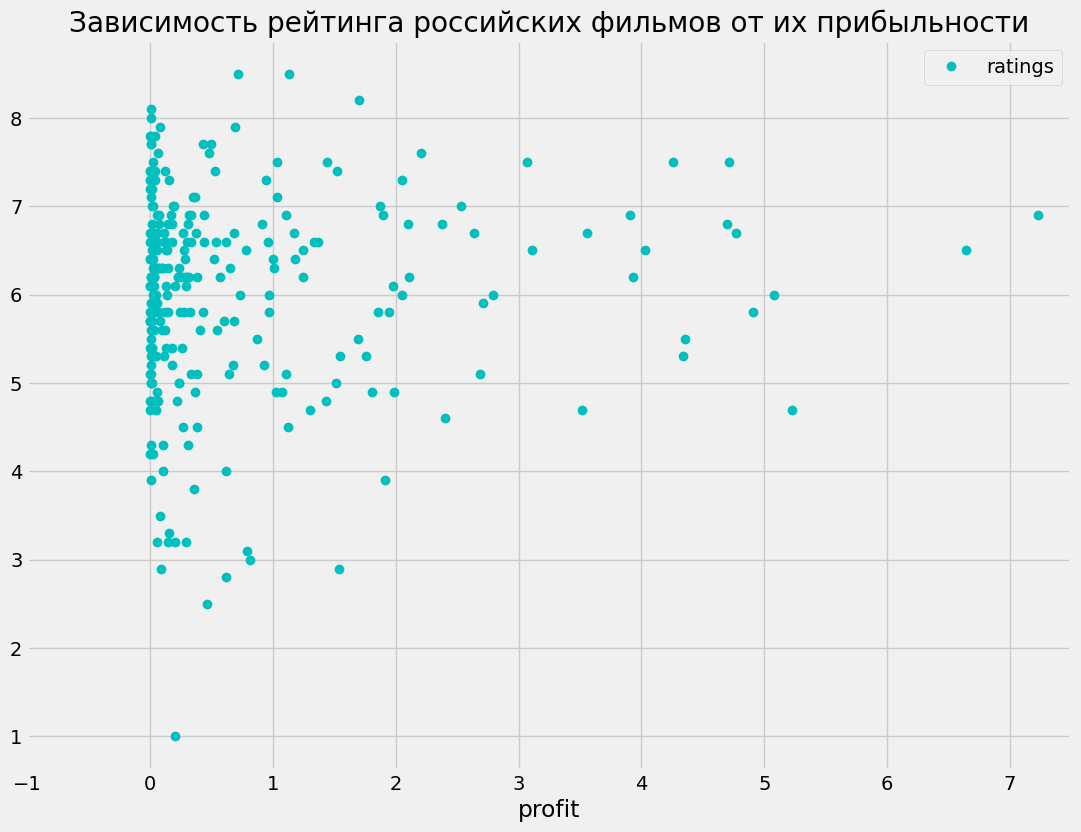

In [112]:
(df_state_support_m.plot(y='ratings', x='profit', style='co'
                 , figsize=(12, 9), xlim=(-1, 7.5)
                 , title = 'Зависимость рейтинга российских фильмов от их прибыльности')
);

Ну, чуть получше. Напомню, что прибыльные фильмы те, у которых значение по оси profit больше 2,5. Т.е. совсем провальных по рейтингу среди прибыльных фильмов мы не видим. Но и совсем отличными их назвать тоже нельзя. Те же фильмы, не лучше, не хуже, чем все остальные.

Тогда что играет роль в таких случаях? Можно предположить, что причиной может быть усиленная рекламная кампания в совокупности с удачно подобранным временем премьеры. Традиционно, таким временем считаются новогодние каникулы. И действительно, если мы посмотрим на долю фильмов вышедших в декабре:

In [113]:
len(df_support_profit.query('show_start_date.dt.month==12')) / len(df_support_profit)

0.4

И сравним ее с долей по всем российским фильмам с поддержкой:

In [114]:
len(df_state_support_m.query('show_start_date.dt.month==12')) / len(df_state_support_m)

0.1144578313253012

То увидим, что да, заработать с новогодним показом гораздо легче.

Посмотрим также, есть ли какая-то связь процента поддержки с рейтингом фильма:

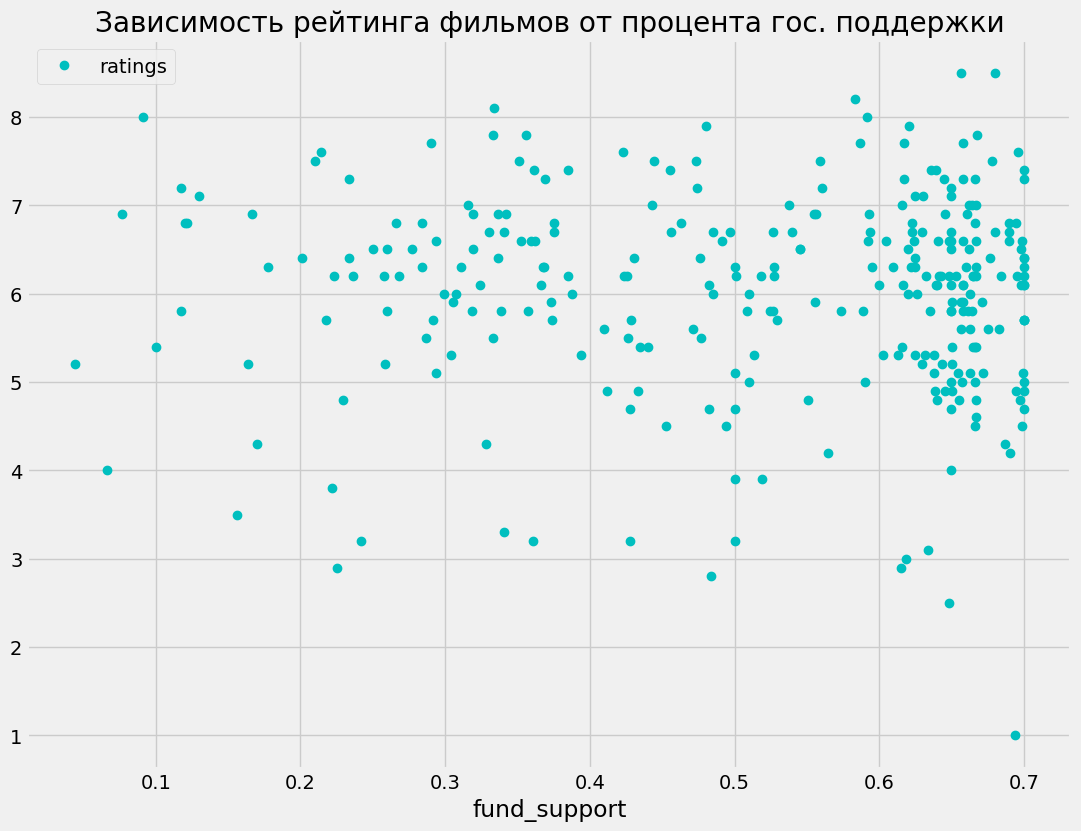

In [115]:
(df_state_support_m.plot(y='ratings', x='fund_support', style='co'
                 , figsize=(12, 9)
                 , title = 'Зависимость рейтинга фильмов от процента гос. поддержки')
);

Похоже, что нет. А как влияет сумма поддержки на рейтинг?

C:\Users\ivano\AppData\Local\Temp\ipykernel_9408\3697844160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_support_m['sum_support'] = df_state_support_m['nonrefundable_support'] + df_state_support_m ['refundable_support']


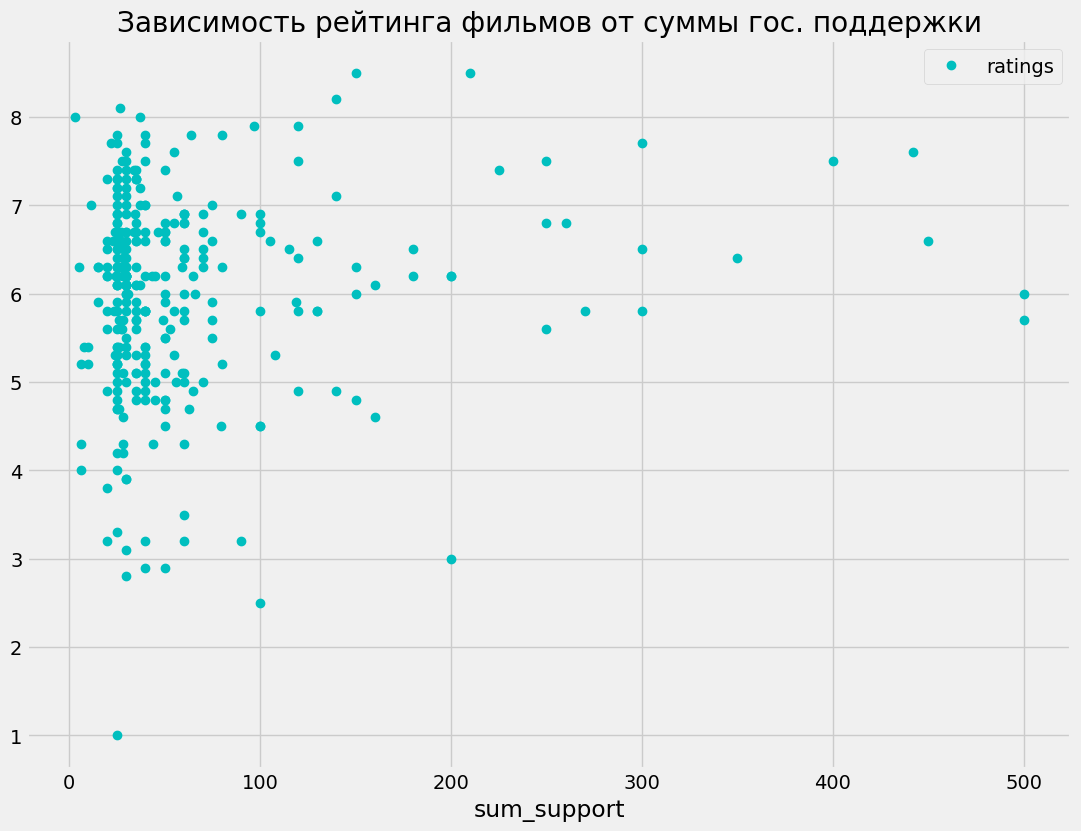

In [116]:
df_state_support_m['sum_support'] = df_state_support_m['nonrefundable_support'] + df_state_support_m ['refundable_support']
(df_state_support_m.plot(y='ratings', x='sum_support', style='co'
                 , figsize=(12, 9)
                 , title = 'Зависимость рейтинга фильмов от суммы гос. поддержки')
);

Картина немного напоминает то, когда мы смотрели зависимость рейтинга от прибыльности фильма. В целом, есть слабая тенденция к росту рейтинга с увеличением размера поддержки.

Теперь посмотрим как распределились наши фильму по типу:

In [117]:
df_state_support_m.groupby('type').count()

,title,show_start_date,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,...,ratings,genres,box_office,year,main_director,main_genre,fund_support,puNumber_year,profit,sum_support
type,,,,,,,,,,,,,,,,,,,,,
Анимационный,31,31,31,31,31,31,31,31,31,25,...,30,30,30,30,31,30,25,31,24,31
Документальный,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,0,1
Художественный,300,300,300,300,300,298,300,300,300,289,...,283,285,288,288,300,285,289,300,277,300


И по жанру:

In [118]:
df_state_support_m.groupby('main_genre').count().sort_values(by='title', ascending=False)['title']

main_genre
драма          93
комедия        74
мультфильм     31
триллер        15
мелодрама      15
фантастика     11
фэнтези        11
ужасы          10
военный         9
приключения     7
семейный        7
боевик          6
детектив        5
история         4
детский         4
мюзикл          4
криминал        3
спорт           3
биография       3
реальное ТВ     1
Name: title, dtype: int64

Хм, несмотря на популярность детского формата, лидируют взрослые жанры. Посмотрим, как это соотносится с возрастными категориями:

In [119]:
df_state_support_age_genre = df_state_support_m.pivot_table(index=['age_restriction', 'main_genre'], values='title', aggfunc='count')
df_state_support_age_genre

title
age_restriction                        main_genre        
«0+» - для любой зрительской аудитории детский          2
                                       мультфильм       3
                                       семейный         2
«12+» - для детей старше 12 лет        биография        2
                                       боевик           1
                                       военный          7
                                       детектив         3
                                       драма           22
                                       история          2
                                       комедия         34
                                       криминал         1
                                       мелодрама        7
                                       мультфильм       1
                                       мюзикл           1
                                       приключения      2
                                       семейный         1
                                       спорт            1
                                       триллер          2
                                       ужасы            1
                                       фантастика       7
                                       фэнтези          4
«16+» - для детей старше 16 лет        боевик           3
                                       военный          1
                                       детектив         1
                                       драма           52
                                       история          1
                                       комедия         29
                                       криминал         2
                                       мелодрама        6
                                       мюзикл           1
                                       приключения      1
                                       триллер         10
                                       ужасы            8
                                       фантастика       1
                                       фэнтези          5
«18+» - запрещено для детей            боевик           2
                                       драма           14
                                       история          1
                                       комедия          4
                                       мелодрама        1
                                       мультфильм       1
                                       триллер          2
                                       ужасы            1
«6+» - для детей старше 6 лет          биография        1
                                       военный          1
                                       детектив         1
                                       детский          2
                                       драма            5
                                       комедия          7
                                       мелодрама        1
                                       мультфильм      26
                                       мюзикл           2
                                       приключения      4
                                       реальное ТВ      1
                                       семейный         4
                                       спорт            2
                                       триллер          1
                                       фантастика       3
                                       фэнтези          2

Веселая получилась табличка. Самая понятная категория - это 0+. Жанры полностью соответствуют возрастной категории. Но в остальных категориях полный бардак. Да, в 6+ доминируют мультфильмы, как и положено, но что там делают драмы и даже один триллер - сложно понять. Впрочем, в нашем мире не существует какой-то жесткой классификации по жанрам, да и вряд ли это возможно. Не будем сильно горевать по этому поводу, и пойдем дальше.

Посмотрим, каким режиссерам оказывается большая поддержка:

In [120]:
df_state_support_director = df_state_support_m.pivot_table(index='main_director', values='sum_support', aggfunc=['sum', 'count'])
df_state_support_director.sort_values(by=('sum', 'sum_support'), ascending=False)

,sum,count
,sum_support,sum_support
main_director,,
Н.Хомерики,660.000000,3
Ф.Бондарчук,500.000000,1
А.Кравчук,500.000000,1
Р.Давлетьяров,459.847945,5
А.Мизгирев,450.000000,1
...,...,...
Ю.Кара,10.000000,1
Е.Жигаева,8.000000,1


Мы видим, что в абсолютном выражении по суммарной поддержке лидирует Хомерики. А если смотреть по популярности, то

In [121]:
df_state_support_director.sort_values(by=('count', 'sum_support'), ascending=False)

,sum,count
,sum_support,sum_support
main_director,,
Р.Давлетьяров,459.847945,5
Д.Дьяченко,351.000000,4
С.Андреасян,325.000000,4
С.Мокрицкий,202.510000,3
А.Цицилин,350.000000,3
...,...,...
Д.Штурманова,20.000000,1
Е.Баранов,40.000000,1


Давлетьяров, единственный, кто получил поддержку для пяти фильмов.  Здесь интересно будет добавить, что Давлетьяров  является членом экспертного совета "Фонда кино" минимум с 2013 года. Вот что говорил режиссер в 2010-м году о новом созданном фонде:

"Ничего, кроме позора и краха этой схемы, через два года я не ожидаю", - сказал Давлетьяров.

"Я не отрицаю, в списке, безусловно, есть достойные люди, их кандидатуры не вызывают сомнений. Но в целом все это бесстыдно и возмутительно", - заключил он.

Тогда (в 2010) Давлетьяров не смог получить от фонда поддержку. Но, через 3 года, войдя в состав совета фонда, Давлетьяров, похоже, сумел наладить работу фонда, и теперь у него нет претензий к происходящим там процессам. С чем его и поздравляем).

Ладно, это был небольшой экскурс в историю Фонда кино. Мы же вернемся к нашим скучным цифрам.

Посмотрим, как менялось число фильмов, которые получали поддержку из бюджета, от года к году:

In [122]:
df_state_support_m_year = df_state_support_m.pivot_table(index='year', values='title', aggfunc='count')
df_state_support_m_year

,title
year,
2013.0,2
2014.0,16
2015.0,85
2016.0,60
2017.0,39
2018.0,56
2019.0,60


Эта табличка говорит нам только о том, что в данном году вышло такое-то кол-во фильмов с гос.участием. Дело в том, что здесь стоит год премьеры фильма. А решение о выделении финансирования обычно принимается на ранних этапах создания фильма, на готовый фильм денег уже не получишь. Например, на фильм, вышедший в конце 2014 года, финансирование было выделено в середине 2013-го.

А что с выделяемыми суммами:

In [123]:
df_state_support_m_sum = df_state_support_m.pivot_table(index='year', values='sum_support', aggfunc=['sum', 'mean'])
df_state_support_m_sum

,sum,mean
,sum_support,sum_support
year,,
2013.0,134.347945,67.173972
2014.0,572.002299,35.750144
2015.0,3631.241459,42.720488
2016.0,4291.635482,71.527258
2017.0,3148.971662,80.742863
2018.0,3446.969465,61.553026
2019.0,4086.000000,68.100000


В целом, ситуация по финансированию более-менее стабильная. Здесь мы тоже не можем привязать ту или иную сумму к конкретному году. Единственное, в начальном периоде наблюдения в 2013-2014 гг. сумма явно меньше. Но это скорее претензии к качеству  и полноте наших исходных данных.

## Вывод.

В данной работе мы изучали рынок российского кинопроката по данным за 2010 - 2019 гг.

Мы видим, что в первые три года наблюдений (2010-2012) выходило в прокат порядка 100 фильмов в год. Далее произошел резкий рост (с 2013 по 2016) от 200 фильмов в год до 500. В 2017-м году по каким-то причинам кол-во премьер снизилось до 350 фильмов. В последние два года наблюдений число фильмов находится в районе 500.

Данные по кассовым сборам, к сожалению, были представлены в усеченном виде. Фильмов с данными о кинопрокате в целом было примерно 46,6%.

Если рассматривать долю таких фильмов в разрезе лет, то мы видим, что с 2010 по 2016 год доля фильмов с информацией о прокате росла с 13% до 82%. Наиболее полно представлен 2016 год

Также, в процессе изучения данных о прокате было установлено, что примерно до середины 2014 года картина кассовых сборов вряд ли отражает реальную ситуацию. Данные ошибочны. Поэтому было предложено ограничить рассмотрение кинопроката годами с 2015-го по 2019-й.

Сумма проката росла с 2015 по 2018 год, в 2019-м произошел небольшой откат. Минимальное значение было в 2015 году, максимальное в 2018.

Разрыв между средним значением и медианой кассовых сборов очень большой. Эти показатели отличаются в 10 и более раз. Это означает, что данные распределены очень неравномерно - фильмы с небольшими кассовыми сборами составляют существенную долю от общего числа и это снижает медианную величину кассовых сборов. С другой стороны, коммерчески успешные фильмы увеличивают среднее значение для кассовых сборов. В совокупности, эти факторы и приводят к такой большой разнице между медианой и средней величиной.

Мы выяснили, что фильмы в категориях 6+ и 12+ смотрит существенно большее число зрителей. Это можно объяснить например тем, что поход в кино является довольно распространенным способом семейного отдыха и на детские фильмы билеты обычно покупаются на всю семью (взрослых и детей). А условная "молодеж", т.е. группа людей от 16-ти лет и до возраста формирования семьи с детьми, не так часто ходит в кинотеатр (и в меньшем составе) и зачастую предпочитает другие формы досуга. Тем не менее суммарные цифры сборов для условно детской и взрослой аудиторий совпадают. Это объясняется гораздо большим числом "взрослых" фильмов в прокате.

Мы увидели, что Министерство культуры использует только один тип поддержки фильмов - невозвратный, и средний размер такой поддержки составляет около 30 млн.руб. Общий размер поддержки за 10 лет составил около 5 млрд.рублей.

Фонд кино за период  2013-2019 гг. выделил 14 млрд.рублей на фильмы, и это почти в три раза больше, чем выделило Министерство культуры. Также, около четверти общей суммы Фонд кино давал с условием возврата выделенных средств. Средний размер невозвратной поддержки составлял 72 млн.руб., а возвратной - 25 млн.руб.

Наконец, совместная поддержка использовалась гораздо реже первых двух вариантов. Общий размер около 1,2 млрд.руб. Средний размер невозвратной поддержки 39 млн.руб., возвратной - 15 млн.руб.

Также было установлено, что максимальным процентом гос. поддержки можно считать уровень в 70%.

В основном, фильмы получают 60-70 процентов государственной поддержки.

Примерно такое же количество фильмов финансируются государством на 30-60 процентов.

И небольшая часть получает поддержку менее 30%.

Если говорить о гос. поддержке в разрезе возрастных категорипй, то разницы особой нет, в среднем, доля поддержки находится в районе 50% для всех возрастных категорий, кроме совсем "малышовой", которая около 40%.

Если говорить о прибыльности кинорынка, то, в целом, картина для российского кино печальная. Детские категории (0+, 6+, 12+) еще как-то стараются держаться на плаву и категория 12+ даже показывает какую-то прибыль. Но наше взрослое кино похоже переживает не лучшие времена. Похоже, что российские кинематографисты пока не научились делать серьезное кино, способное привлечь в кинотеатры миллионы зрителей.

По окупаемости можно еще добавить, что создатели фильма получают не более 40% от проката (если верить информации в поисковиках). А в таком случае, все возрастные категории в среднем глубоко убыточны.

Снятые в период с 2013 по 2015 гг. 25 российских фильмов с гос. поддержкой смогли заработать достаточно денег, чтобы окупить все затраты на создание.

Но, что касается их рейтинга, то он в среднем не отличается от остальных фильмов, получивших поддержку. Что же им помогло собрать большую кассу? Можно предположить, что причиной могла быть усиленная рекламная кампания в совокупности с удачно подобранным временем премьеры. Традиционно, таким временем считаются новогодние каникулы. И действительно, если мы посмотрим на долю прибыльных фильмов вышедших в декабре, и сравним ее с долей по всем российским фильмам с поддержкой, то увидим разницу почти в 4 раза. Т.е. заработать с новогодним показом гораздо легче.